#plots:

We restarted from the beginning !

## Radio vs Temp different time scales

In [1]:
%matplotlib inline 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
#from lmfit import minimize, Parameters, Parameter, report_fit
import os
import sys
srcpwd = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/script'
utilspath =srcpwd + '/utils/'
sys.path.append(utilspath)
import utils
classpath = srcpwd + '/classes/'
sys.path.append(classpath)
import dataset

datafolder = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/data/'
#fname = 'Antenna_2014-01-01_2014-01-30.root'                                                                                                                     
fname = 'Antenna_2014-01-01_2014-12-31.root'
file = datafolder + fname

data = dataset.Dataset(file)
data.loaddata()

Welcome to ROOTaaS 6.06/00


In [3]:
#basic condition to get clean data
# (remove some outliers in temp and in radio)
#import numpy as np
cond = np.where(
    (data.data['LSId']==343)
    & (data.data['FDLLOutsideTemp']>-10)
    & (data.data['Anode'][:,0]> 400)
    &(np.invert(np.isnan(data.data['FDLLOutsideTemp']) ))
    &(np.invert(np.isinf(data.data['FDLLOutsideTemp']) ))
    &(np.invert(np.isnan(data.data['LLHumidity']) ))
    &(np.invert(np.isinf(data.data['LLHumidity']) ))
    )
#get the data from the data instance
temp = data.getdata('FDLLOutsideTemp',cond)
tempelec = data.getdata('TempElec',cond)
aeraE = data.getdata('AeraEField',cond)
hum = data.getdata('LLHumidity',cond)
radio = data.getdata('Anode',cond,0)
time = data.getdata('Time',cond)
hhmm = data.getdata('hhmm',cond)
solarV = data.getdata('SolarPanelV',cond)
solarI = data.getdata('SolarPanelI',cond)

varradio = data.getdata('VarianceAnode',cond,0)
#this is just for the fft (in case there is odd number of sample 
# the result after filtering is not the same size)
if (len(time) %2 == 1):
    temp = temp[:-1]
    tempelec = tempelec[:-1]
    aeraE = aeraE[:-1]
    hum = hum[:-1]
    radio = radio[:-1]
    varradio = varradio[:-1]
    time = time[:-1]
    hhmm = hhmm[:-1]
    solarV = solarV[:-1]
    solarI = solarI[:-1]    

###radio vs time:

In [5]:
date = utils.nptstamptodatetime(time)

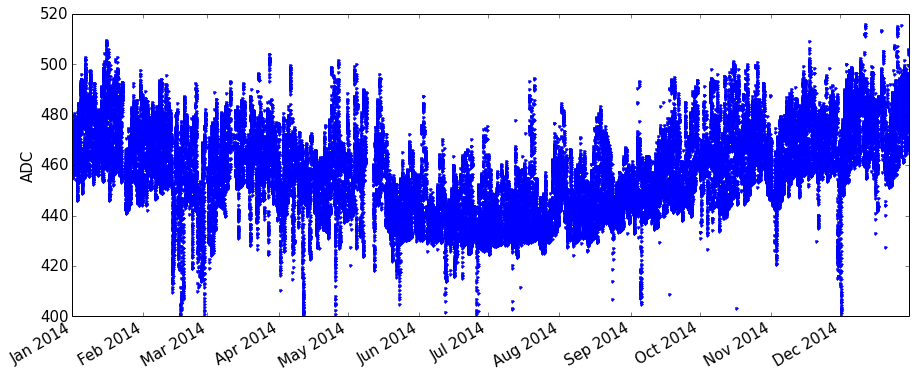

In [138]:
fig = plt.figure(figsize=(15,6))
plt.plot(date,radio,'.')
plt.ylabel('ADC')
plt.gcf().autofmt_xdate()

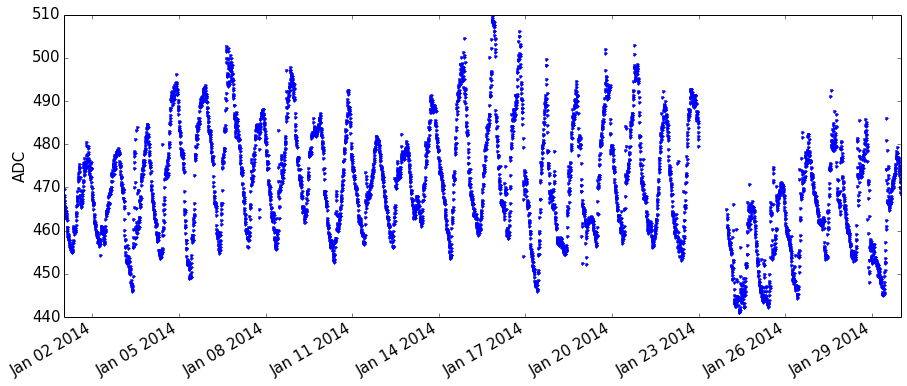

In [19]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,1,30)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.gcf().autofmt_xdate()

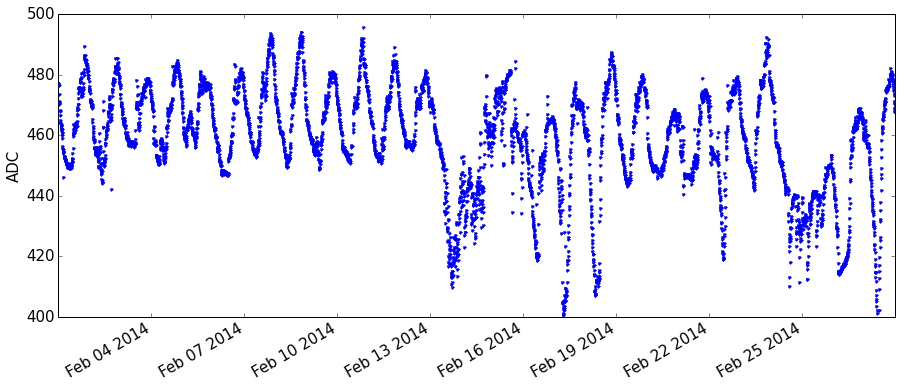

In [139]:
import datetime
datelim1 = datetime.datetime(2014,2,1)
datelim2 = datetime.datetime(2014,2,28)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.gcf().autofmt_xdate()

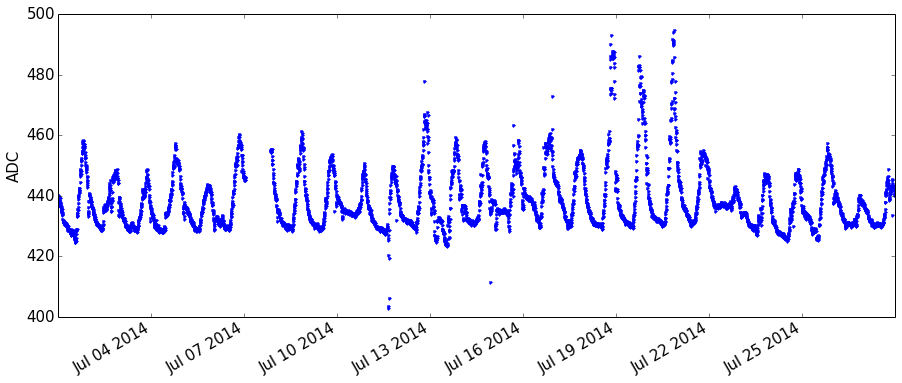

In [140]:
import datetime
datelim1 = datetime.datetime(2014,7,1)
datelim2 = datetime.datetime(2014,7,28)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.gcf().autofmt_xdate()

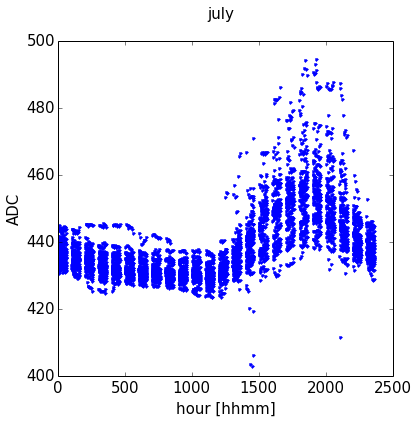

In [141]:
import datetime
datelim1 = datetime.datetime(2014,7,1)
datelim2 = datetime.datetime(2014,7,30)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(6,6))
fig.suptitle('july',fontsize=15)
plt.plot(hhmm[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.xlabel('hour [hhmm]')
#plt.gcf().autofmt_xdate()

###radio vs temperature:

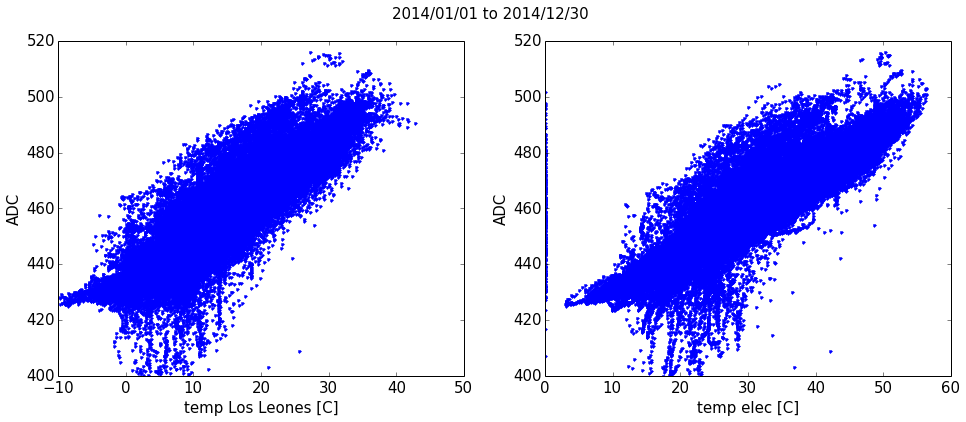

In [142]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,12,30)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(16,6))
fig.suptitle(datelim1.strftime('%Y/%m/%d') + ' to ' + datelim2.strftime('%Y/%m/%d') ,fontsize=15)
plt.subplot(121)
plt.plot(temp[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.xlabel('temp Los Leones [C]')
plt.subplot(122)
plt.plot(tempelec[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.xlabel('temp elec [C]')

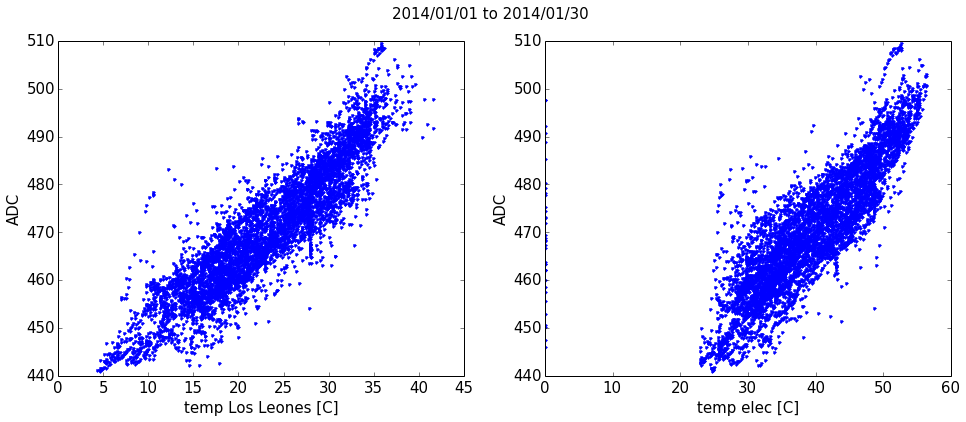

In [143]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,1,30)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(16,6))
fig.suptitle(datelim1.strftime('%Y/%m/%d') + ' to ' + datelim2.strftime('%Y/%m/%d') ,fontsize=15)
plt.subplot(121)
plt.plot(temp[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.xlabel('temp Los Leones [C]')
plt.subplot(122)
plt.plot(tempelec[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.xlabel('temp elec [C]')

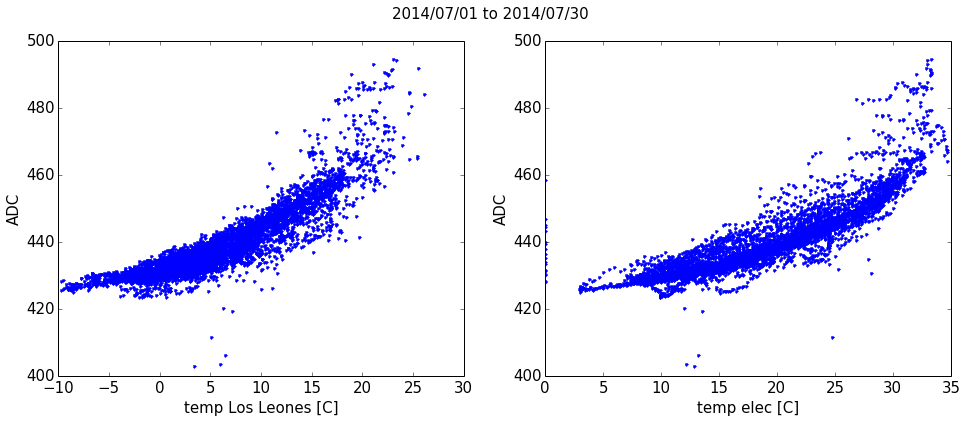

In [144]:
import datetime
datelim1 = datetime.datetime(2014,7,1)
datelim2 = datetime.datetime(2014,7,30)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(16,6))
fig.suptitle(datelim1.strftime('%Y/%m/%d') + ' to ' + datelim2.strftime('%Y/%m/%d') ,fontsize=15)
plt.subplot(121)
plt.plot(temp[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.xlabel('temp Los Leones [C]')
plt.subplot(122)
plt.plot(tempelec[datecond],radio[datecond],'.')
plt.ylabel('ADC')
plt.xlabel('temp elec [C]')

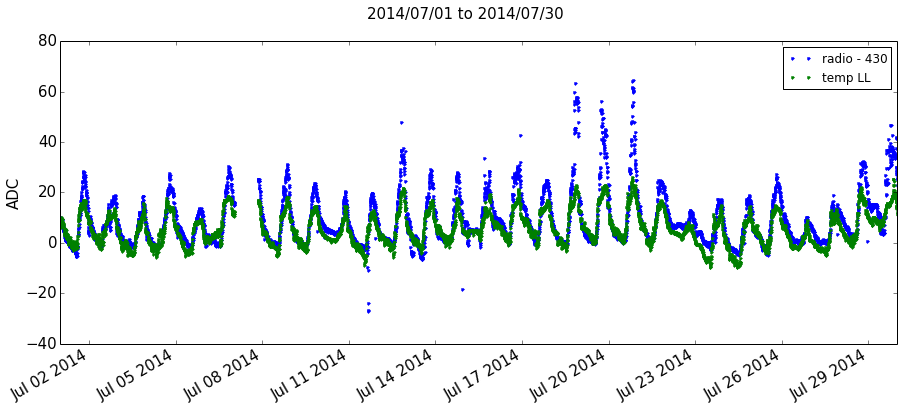

In [145]:
import datetime
datelim1 = datetime.datetime(2014,7,1)
datelim2 = datetime.datetime(2014,7,30)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(15,6))
fig.suptitle(datelim1.strftime('%Y/%m/%d') + ' to ' + datelim2.strftime('%Y/%m/%d') ,fontsize=15)
plt.plot(date[datecond],radio[datecond]-430,'.',label='radio - 430')
plt.plot(date[datecond],temp[datecond],'.',label='temp LL')
plt.ylabel('ADC')
plt.legend()
plt.gcf().autofmt_xdate()

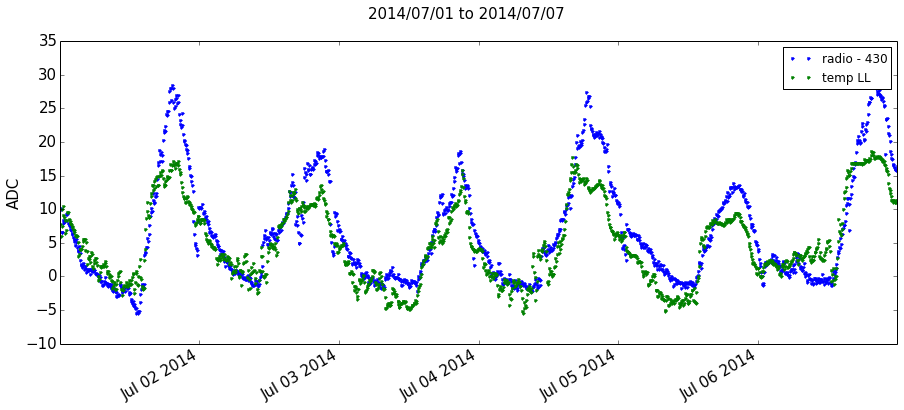

In [146]:
import datetime
datelim1 = datetime.datetime(2014,7,1)
datelim2 = datetime.datetime(2014,7,7)
datecond = np.where((date > datelim1) & (date < datelim2))
fig = plt.figure(figsize=(15,6))
fig.suptitle(datelim1.strftime('%Y/%m/%d') + ' to ' + datelim2.strftime('%Y/%m/%d') ,fontsize=15)
plt.plot(date[datecond],radio[datecond]-430,'.',label='radio - 430')
plt.plot(date[datecond],temp[datecond],'.',label='temp LL')
plt.ylabel('ADC')
plt.legend()
plt.gcf().autofmt_xdate()

### scale of variations:

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


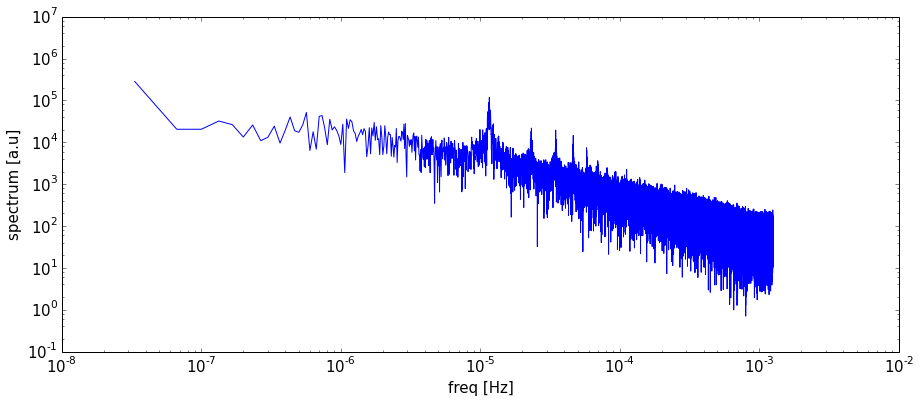

In [147]:
fftradio = np.fft.rfft(radio)
ffttemp = np.fft.rfft(temp)
deltat = time[1] - time[0]
freq = np.fft.rfftfreq(len(temp),deltat)
hourscale = 1/(3600*freq)
fig = plt.figure(figsize=(15,6))
#fig.suptitle(datelim1.strftime('%Y/%m/%d') + ' to ' + datelim2.strftime('%Y/%m/%d') ,fontsize=15)
plt.loglog(freq,np.absolute(ffttemp))
plt.ylabel('spectrum [a.u]')
plt.xlabel('freq [Hz]')

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


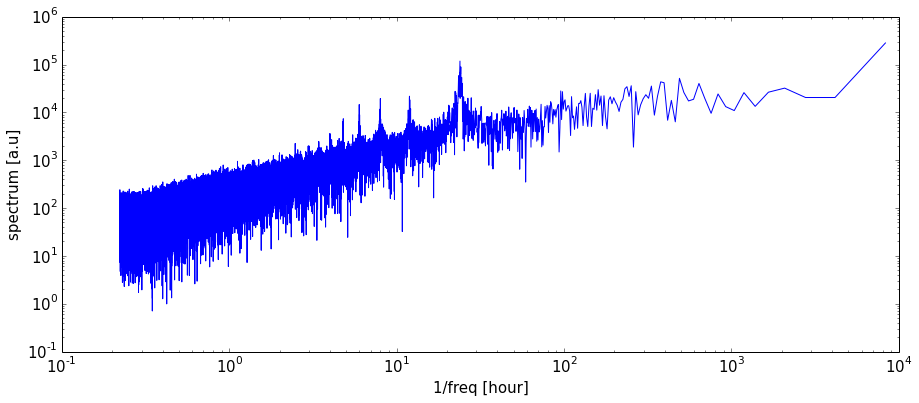

In [148]:
fftradio = np.fft.rfft(radio)
ffttemp = np.fft.rfft(temp)
deltat = time[1] - time[0]
freq = np.fft.rfftfreq(len(temp),deltat)
hourscale = 1/(3600*freq)
fig = plt.figure(figsize=(15,6))
#fig.suptitle(datelim1.strftime('%Y/%m/%d') + ' to ' + datelim2.strftime('%Y/%m/%d') ,fontsize=15)
plt.loglog(hourscale,np.absolute(ffttemp))
plt.ylabel('spectrum [a.u]')
plt.xlabel('1/freq [hour]')

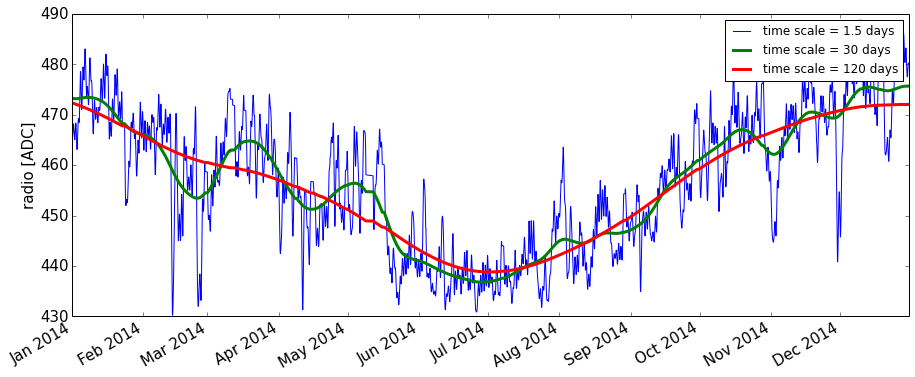

In [305]:
# different filtering :
deltat = time[1] - time[0]
fig = plt.figure(figsize=(15,6))
#tcuts = [1,7,30,150]
tcuts = [1.5*24,30*24,120*24]
counter = 0
for t in tcuts:
    fcut = 1./(t*3600)
    radiof = utils.lowpass(radio,1./(deltat),2,fcut)
    lw = 1
    if counter > 0:
        lw = 3
    plt.plot(date,radiof,lw=lw,label='time scale = '+str(t/24) +' days')
    counter+=1
plt.ylabel('radio [ADC]')
plt.legend()
plt.gcf().autofmt_xdate()
#plt.xlabel('date')

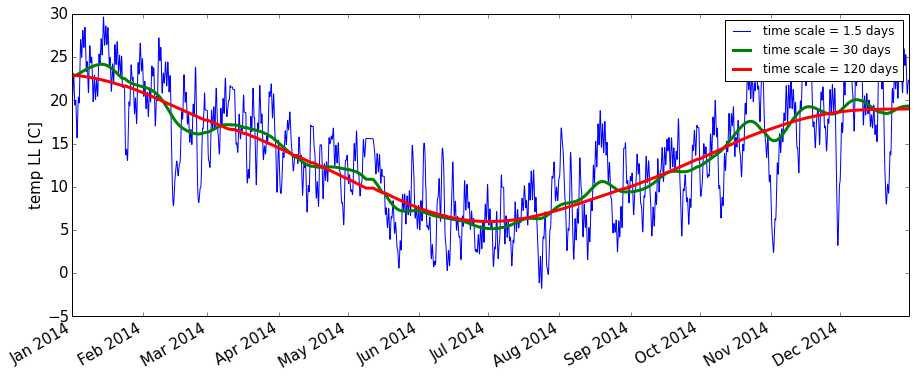

In [304]:
# different filtering :
deltat = time[1] - time[0]
fig = plt.figure(figsize=(15,6))
#tcuts = [1,7,30,150]
tcuts = [1.5*24,30*24,120*24]
counter = 0
for t in tcuts:
    fcut = 1./(t*3600)
    tempf = utils.lowpass(temp,1./(deltat),2,fcut)
    lw = 1
    if counter > 0:
        lw = 3
    plt.plot(date,tempf,lw=lw,label='time scale = '+str(t/24) +' days')
    counter+=1
plt.ylabel('temp LL [C]')
plt.legend()
plt.gcf().autofmt_xdate()
#plt.xlabel('date')

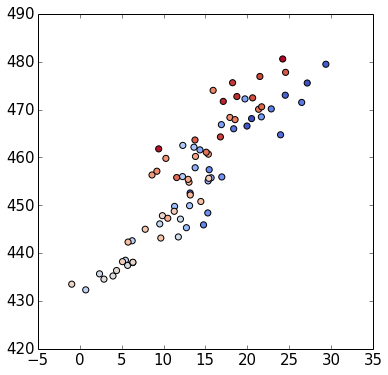

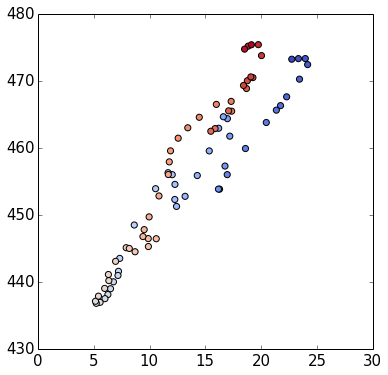

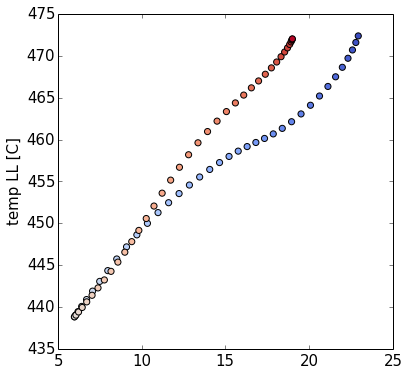

In [306]:
# different filtering :
deltat = time[1] - time[0]
#tcuts = [1,7,30,150]
tcuts = [1.5*24,30*24,120*24]
counter = 0
for t in tcuts:
    fcut = 1./(t*3600)
    #tempf = utils.lowpasshard(temp,1./(deltat),fcut)
    #radiof = utils.lowpasshard(radio,1./(deltat),fcut)
    tempf = utils.lowpass(temp,1./(deltat),2,fcut)
    radiof = utils.lowpass(radio,1./(deltat),2,fcut)
    lw = 1
    if counter > 0:
        lw = 3
    fig = plt.figure(figsize=(6,6))
    plt.scatter(tempf[::1000],radiof[::1000], marker='.',s=150, linewidths=1, c =time[::1000], cmap=plt.cm.coolwarm)
    #label='time scale = '+str(t/24) +' days')
    counter+=1
plt.ylabel('temp LL [C]')
plt.legend()
#plt.gcf().autofmt_xdate()

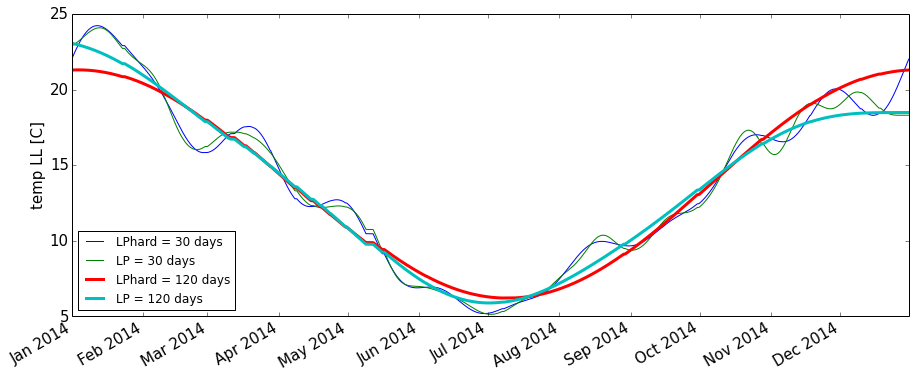

In [152]:
# different filtering :
deltat = time[1] - time[0]
fig = plt.figure(figsize=(15,6))
#tcuts = [1,7,30,150]
tcuts = [30*24,120*24]
counter = 0
for t in tcuts:
    fcut = 1./(t*3600)
    tempf = utils.lowpasshard(temp,1./(deltat),fcut)
    tempf2 = utils.lowpass(temp,1./(deltat),3,fcut)
    lw = 1
    if counter > 0:
        lw = 3
    plt.plot(date,tempf,lw=lw,label='LPhard = '+str(t/24) +' days')
    plt.plot(date,tempf2,lw=lw,label='LP = '+str(t/24) +' days')
    counter+=1
plt.ylabel('temp LL [C]')
plt.legend(loc=3)
plt.gcf().autofmt_xdate()
#plt.xlabel('date')

no filtered no fit :  13.0776779075 no filtered :  8.54811
filtered  1.5  days no fit: 9.52190531248 fit: 5.71989852368
filtered  30  days no fit: 12.5700861981 fit: 7.15683999669
filtered  120  days no fit: 13.0776779075 fit: 7.68716361213


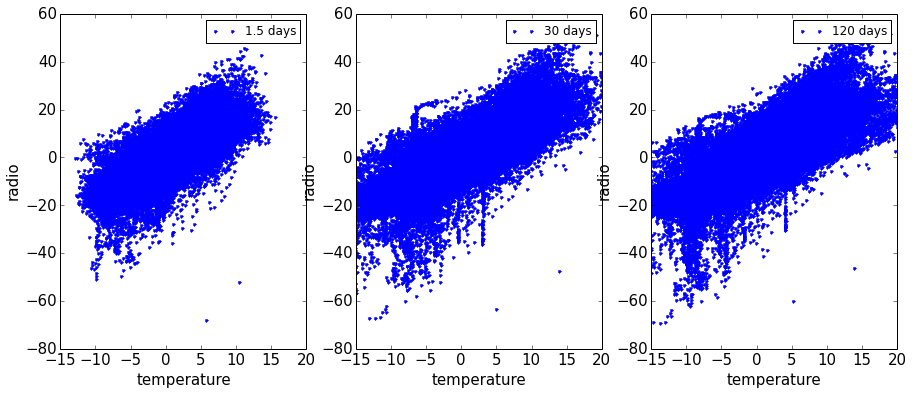

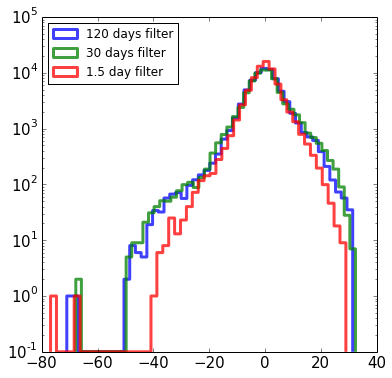

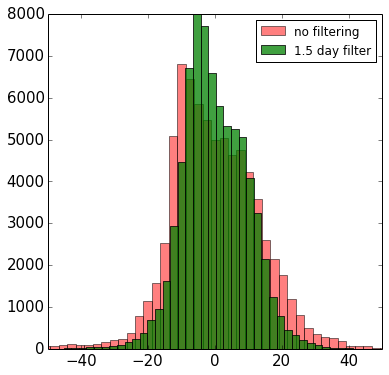

In [37]:
# different filtering :
deltat = time[1] - time[0]
fig = plt.figure(figsize=(15,6))
#tcuts = [1,7,30,150]
tcuts = [1.5*24,30*24,120*24]
counter = 0
radiofiltered = []
tempfiltered = []
for t in tcuts:
    fcut = 1./(t*3600)
    tempf = utils.highpass(temp,1./(deltat),2,fcut)
    radiof = utils.highpass(radio,1./(deltat),2,fcut)
    radiofiltered.append(radiof)
    tempfiltered.append(tempf)
#print len(tempfiltered[0]), len(tempfiltered[0])
fig = plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(tempfiltered[0],radiofiltered[0],'.',label='1.5 days')
plt.xlabel('temperature')
plt.ylabel('radio')
plt.xlim(-15,20)
plt.legend()
#plt.plot(temp,radiofiltered[0],'.')
plt.subplot(132)
plt.plot(tempfiltered[1],radiofiltered[1],'.',label='30 days')
plt.xlabel('temperature')
plt.ylabel('radio')
plt.xlim(-15,20)
plt.legend()
#plt.plot(temp,radiofiltered[1],'.')
plt.subplot(133)
plt.plot(tempfiltered[2],radiofiltered[2],'.',label='120 days')
plt.xlabel('temperature')
plt.ylabel('radio')
plt.xlim(-15,20)
plt.legend()
#plt.plot(temp,radiofiltered[2],'.')

#fits:
fit = np.polyfit(temp,radio,1)
p = np.poly1d(fit)
fit0 = np.polyfit(tempfiltered[0],radiofiltered[0],1)
p0 = np.poly1d(fit0)
fit1 = np.polyfit(tempfiltered[1],radiofiltered[1],1)
p1 = np.poly1d(fit1)
fit2 = np.polyfit(tempfiltered[2],radiofiltered[2],1)
p2 = np.poly1d(fit2)
newradio = radio - p(temp)
newradio0 = radiofiltered[0] - p0(tempfiltered[0])
newradio1 = radiofiltered[1] - p1(tempfiltered[1])
newradio2 = radiofiltered[2] - p2(tempfiltered[2])

figafterfit = plt.figure(figsize=(6,6))
#n, bins, patches = plt.hist(newradio, 50, facecolor='red', alpha=0.5,label='no filtering')

n1, bins1, patches1 = plt.hist(newradio1, 50, histtype='step', lw=3, alpha=0.75,log=True,label='120 days filter')
n2, bins2, patches2 = plt.hist(newradio2, 50, histtype='step',lw=3, alpha=0.75,log=True,label='30 days filter')
n0, bins0, patches0 = plt.hist(newradio0, 50, histtype='step', lw=3, alpha=0.75,log=True,label='1.5 day filter')
plt.legend(loc=2)

fig2 = plt.figure(figsize=(6,6))
n, bins, patches = plt.hist(radiof, 50, facecolor='red', alpha=0.5,label='no filtering')
n0, bins0, patches0 = plt.hist(radiofiltered[0], 50, facecolor='green', alpha=0.75,label='1.5 day filter')
plt.xlim(-50,50)
plt.legend()
print 'no filtered no fit : ', np.std(radiof), 'no filtered : ', np.std(newradio)
print 'filtered ', str(tcuts[0]/24),' days no fit:', np.std(radiofiltered[0]), 'fit:', np.std(newradio0)
print 'filtered ', str(tcuts[1]/24),' days no fit:', np.std(radiofiltered[1]), 'fit:', np.std(newradio1) 
print 'filtered ', str(tcuts[2]/24),' days no fit:', np.std(radiofiltered[2]), 'fit:', np.std(newradio2) 

- now we use filtered data

In [6]:
deltat = time[1] - time[0]
tcut = 1.5*24
fcut = 1./(tcut*3600)
tempf = utils.highpass(temp,1./(deltat),2,fcut)
radiof = utils.highpass(radio,1./(deltat),2,fcut)

std =  5.7199366136


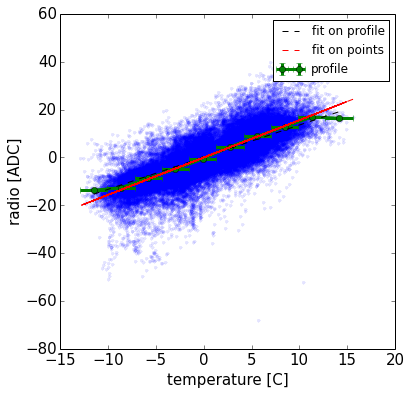

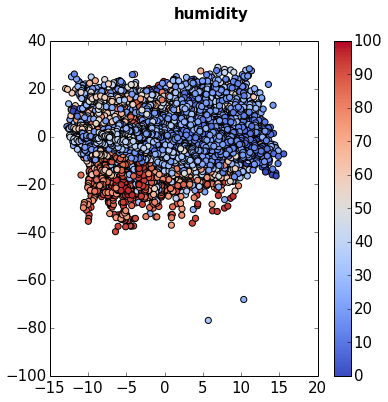

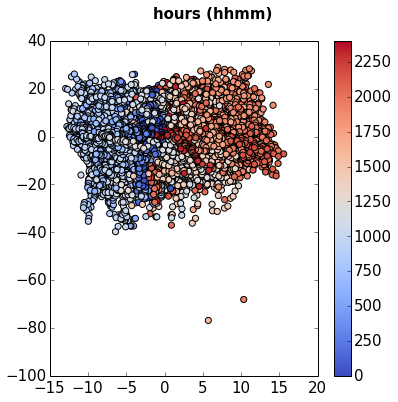

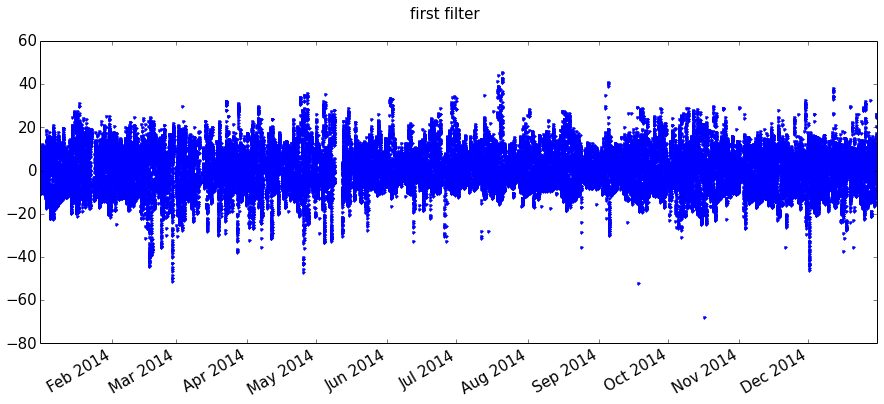

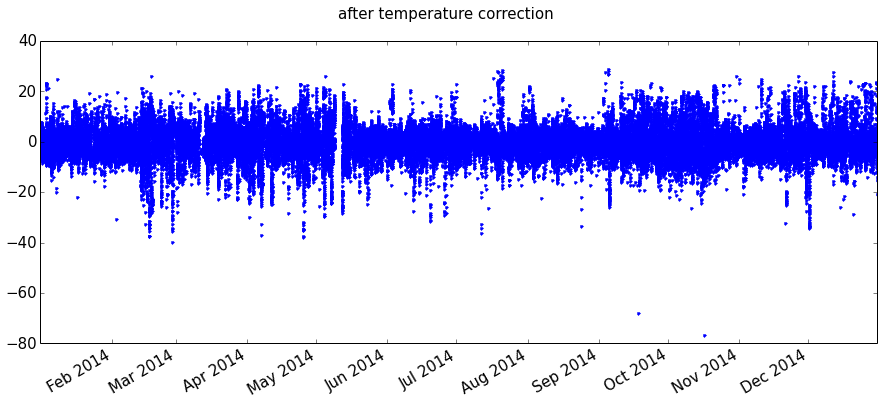

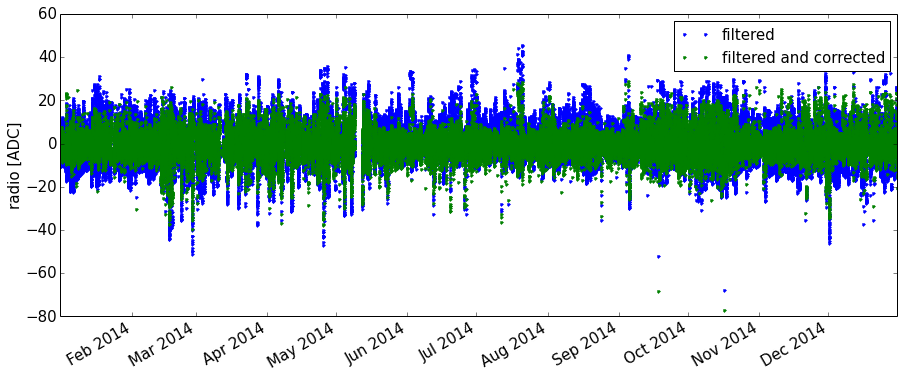

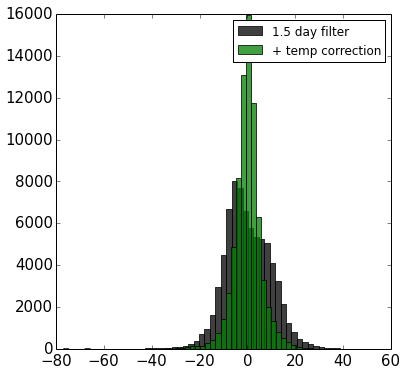

In [16]:
import datetime
deltat = time[1] - time[0]
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,12,31)
datecond = np.where((date > datelim1) & (date < datelim2) )
counter = 0
#get the profile:
prof = utils.makeprofile(tempf[datecond],radiof[datecond],10,np.min(tempf[datecond]),np.max(tempf[datecond]))
#fits:
fit0 = np.polyfit(tempf,radiof,1)
fitprof = np.polyfit(prof[0],prof[1],1,w=1/prof[2])
p0 = np.poly1d(fit0)
pprof = np.poly1d(fitprof)
newradio0 = radiof[datecond] - p0(tempf[datecond])
fig0 = plt.figure(figsize=(6,6))
plt.plot(tempf[datecond],radiof[datecond],'.',alpha=0.1,zorder=-32)
plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],marker='o',lw=3,label='profile')
plt.plot(prof[0],pprof(prof[0]),'k--',lw=1,label='fit on profile')
plt.plot(tempf[datecond], p0(tempf[datecond]),'r--',lw=1,label='fit on points')
plt.legend()
plt.xlabel('temperature [C]')
plt.ylabel('radio [ADC]')
#plt.plot(varradio[datecond],newradio[datecond],'.')

fig = plt.figure(figsize=(6,6))
fig.suptitle('humidity',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig2 = plt.figure(figsize=(6,6))
fig2.suptitle('hours (hhmm)',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
figfirstfilt = plt.figure(figsize=(15,6))
figfirstfilt.suptitle('first filter',fontsize=15)
plt.plot(date[datecond], radiof[datecond],'.')
plt.gcf().autofmt_xdate()
figcorr = plt.figure(figsize=(15,6))
figcorr.suptitle('after temperature correction',fontsize=15)
plt.plot(date[datecond], newradio0,'.')
plt.gcf().autofmt_xdate()

figboth = plt.figure(figsize=(15,6))
plt.plot(date[datecond], radiof[datecond],'.',label='filtered')
plt.plot(date[datecond], newradio0,'.',label='filtered and corrected')
plt.ylabel('radio [ADC]')
plt.legend(fontsize=15)
plt.gcf().autofmt_xdate()
#distributions:
figdist = plt.figure(figsize=(6,6))
n, bins, patches = plt.hist(radiof[datecond], 50, facecolor='black', alpha=0.75,label='1.5 day filter')
n0, bins0, patches0 = plt.hist(newradio0, 50, facecolor='green', alpha=0.75,label='+ temp correction')
plt.legend()

#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
print 'std = ' , np.std(newradio0)

std =  4.39053467937


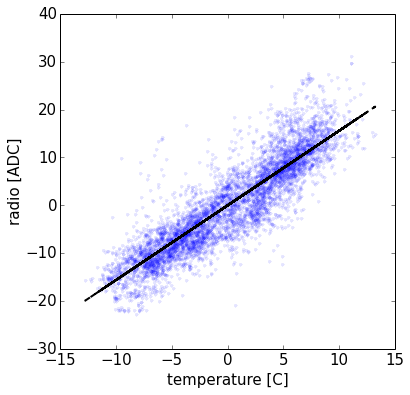

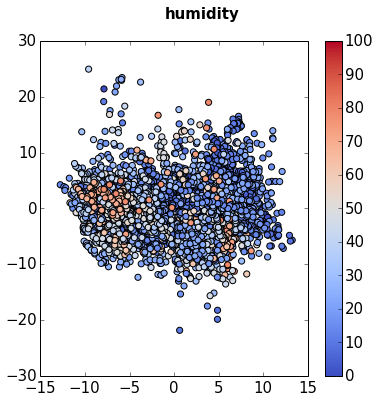

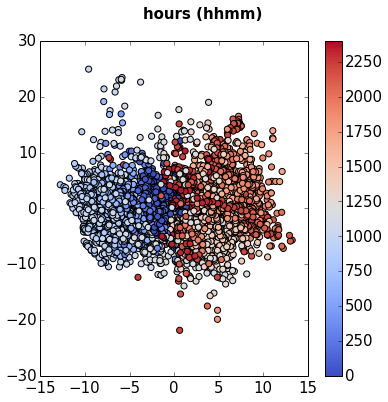

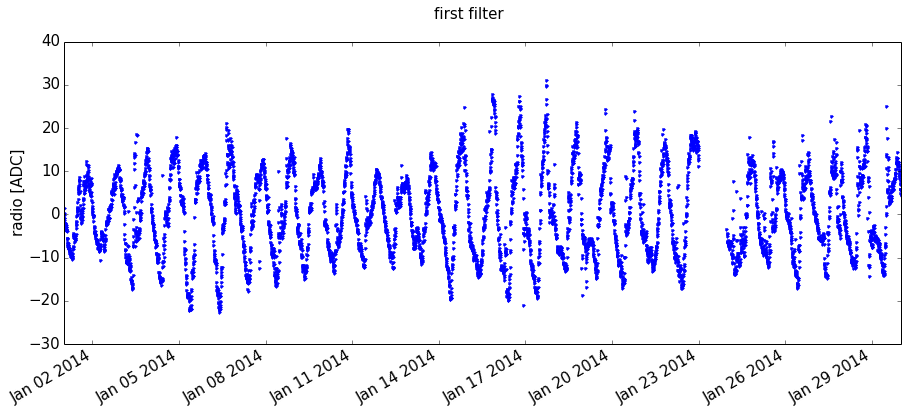

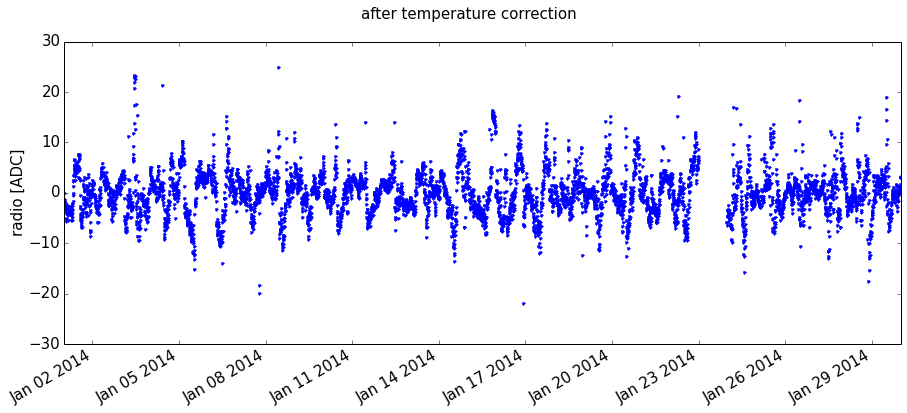

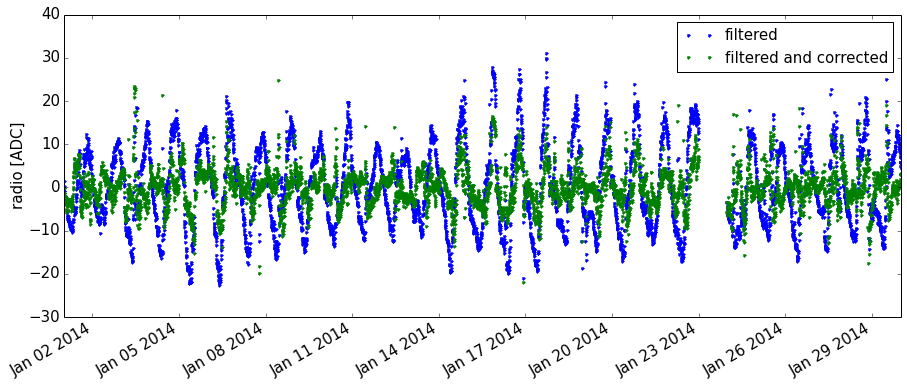

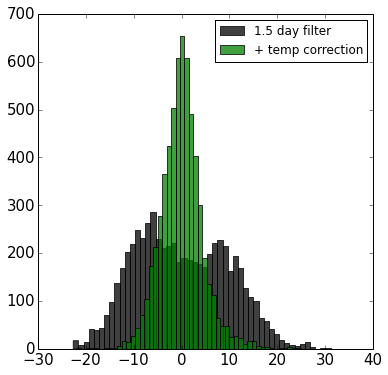

In [25]:
import datetime
deltat = time[1] - time[0]
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,1,30)
datecond = np.where((date > datelim1) & (date < datelim2) )
counter = 0
#get the profile:
prof = utils.makeprofile(tempf[datecond],radiof[datecond],10,np.min(tempf[datecond]),np.max(tempf[datecond]))
#fits:
fit0 = np.polyfit(tempf,radiof,1)
fitprof = np.polyfit(prof[0],prof[1],1,w=1/prof[2])
p0 = np.poly1d(fit0)
pprof = np.poly1d(fitprof)
newradio0 = radiof[datecond] - p0(tempf[datecond])
fig0 = plt.figure(figsize=(6,6))
plt.plot(tempf[datecond],radiof[datecond],'.',alpha=0.1)
#plt.errorbar(prof[0],prof[1],yerr=prof[2],lw=3)
#plt.plot(prof[0],pprof(prof[0]),'r--')
plt.plot(tempf[datecond], p0(tempf[datecond]),'k--',lw=2)
plt.xlabel('temperature [C]')
plt.ylabel('radio [ADC]')
#plt.plot(varradio[datecond],newradio[datecond],'.')

fig = plt.figure(figsize=(6,6))
fig.suptitle('humidity',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig2 = plt.figure(figsize=(6,6))
fig2.suptitle('hours (hhmm)',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
figfirstfilt = plt.figure(figsize=(15,6))
figfirstfilt.suptitle('first filter',fontsize=15)
plt.plot(date[datecond], radiof[datecond],'.')
plt.ylabel('radio [ADC]')
plt.gcf().autofmt_xdate()
figcorr = plt.figure(figsize=(15,6))
figcorr.suptitle('after temperature correction',fontsize=15)
plt.plot(date[datecond], newradio0,'.')
plt.ylabel('radio [ADC]')
plt.gcf().autofmt_xdate()

figboth = plt.figure(figsize=(15,6))
plt.plot(date[datecond], radiof[datecond],'.',label='filtered')
plt.plot(date[datecond], newradio0,'.',label='filtered and corrected')
plt.ylabel('radio [ADC]')
plt.legend(fontsize=15)
plt.gcf().autofmt_xdate()
#distributions:
figdist = plt.figure(figsize=(6,6))
n, bins, patches = plt.hist(radiof[datecond], 50, facecolor='black', alpha=0.75,label='1.5 day filter')
n0, bins0, patches0 = plt.hist(newradio0, 50, facecolor='green', alpha=0.75,label='+ temp correction')
plt.legend()

#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
print 'std = ' , np.std(newradio0)

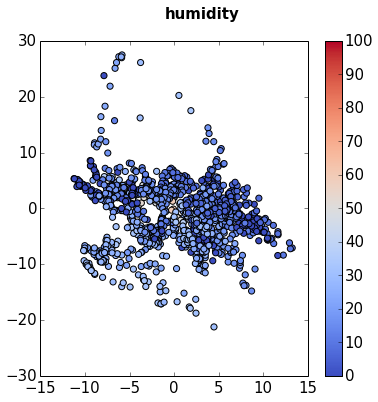

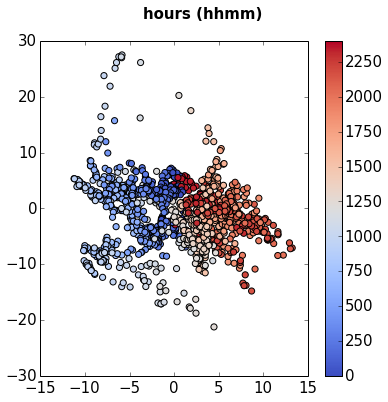

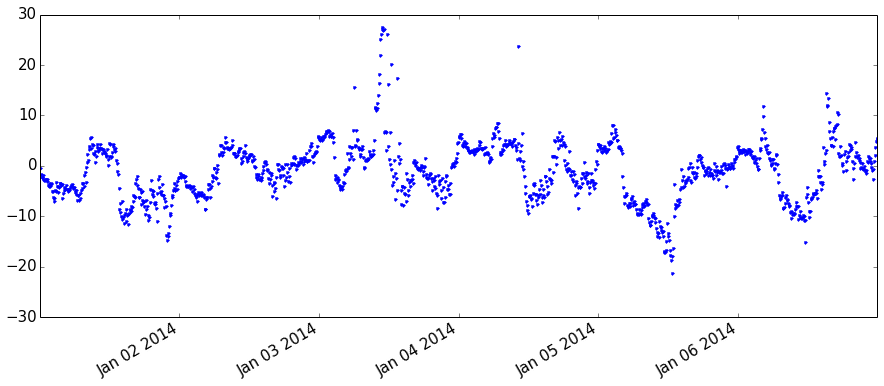

In [182]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,1,7)
datecond = np.where((date > datelim1) & (date < datelim2) )
counter = 0
#fits:
fit0 = np.polyfit(tempf,radiof,1)
p0 = np.poly1d(fit0)
newradio0 = radiof - p0(tempf)

fig = plt.figure(figsize=(6,6))
fig.suptitle('humidity',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio[datecond], marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig2 = plt.figure(figsize=(6,6))
fig2.suptitle('hours (hhmm)',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio[datecond], marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond], newradio[datecond],'.')
plt.gcf().autofmt_xdate()

- cut in humidity

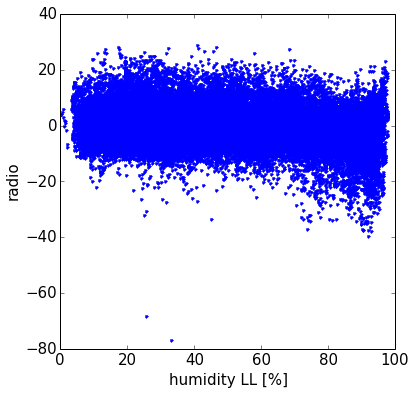

In [198]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,12,31)
datecond = np.where((date > datelim1) & (date < datelim2) & (hum>0))
deltat = time[1] - time[0]

#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],1)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])

fig = plt.figure(figsize=(6,6))
plt.plot(hum[datecond],newradio0,'.')
plt.ylabel('radio')
plt.xlabel('humidity LL [%]')

#fig.suptitle('humidity',fontsize=15, fontweight='bold')


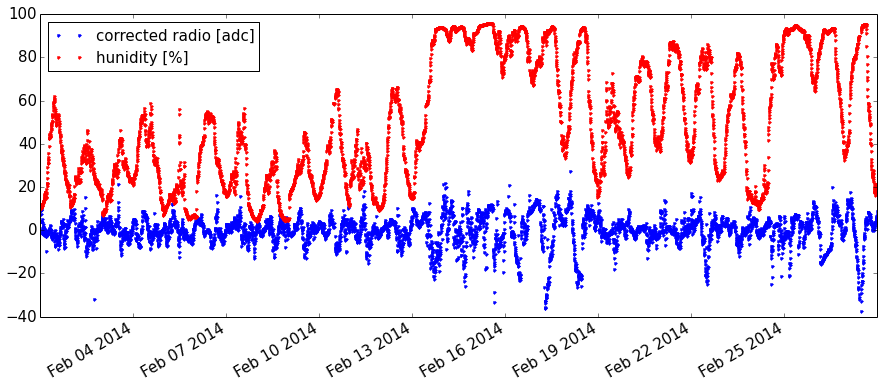

In [30]:
import datetime
datelim1 = datetime.datetime(2014,2,1)
datelim2 = datetime.datetime(2014,2,28)
datecond = np.where((date > datelim1) & (date < datelim2))
deltat = time[1] - time[0]

#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],1)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])

fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond], newradio0,'.',label='corrected radio [adc]')
plt.plot(date[datecond], hum[datecond],'r.',label='hunidity [%]')
plt.legend(loc=2,fontsize=15)
#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
plt.gcf().autofmt_xdate()


before cut =  5.7199366136
after cut =  5.13931628994


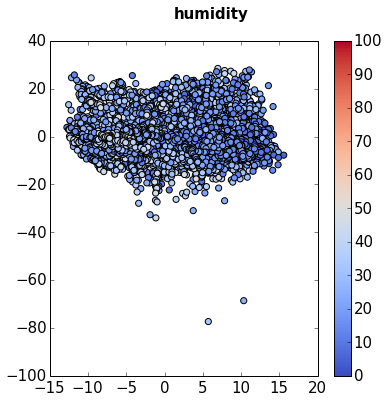

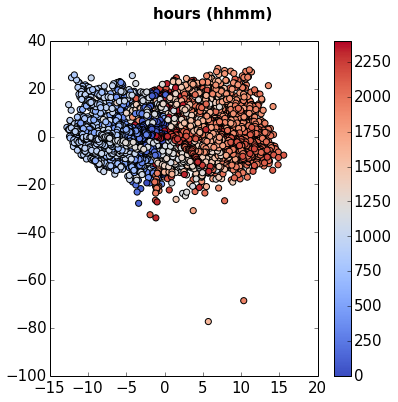

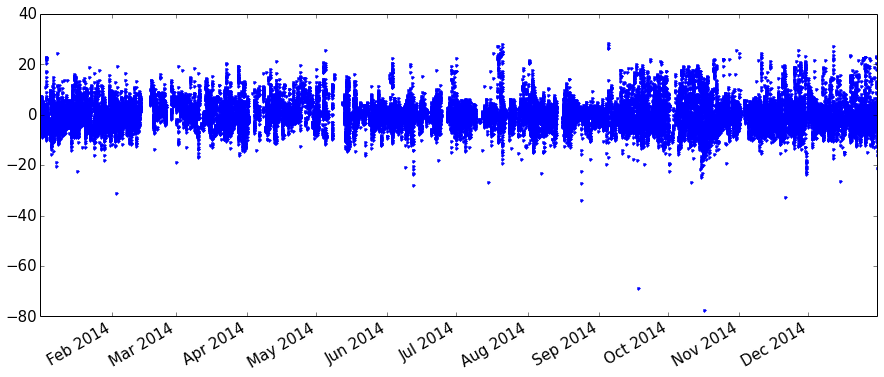

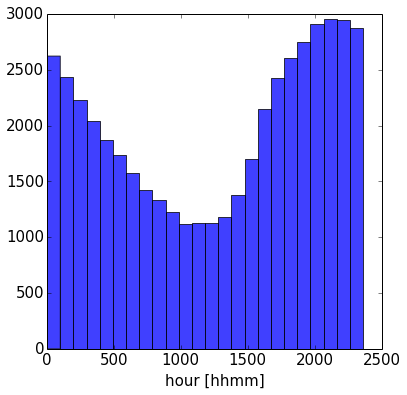

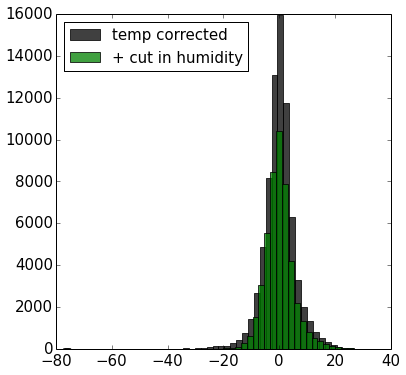

In [38]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,12,31)
datecond = np.where((date > datelim1) & (date < datelim2) )
datecondandhum = np.where((date > datelim1) & (date < datelim2) & (hum > 0) & (hum < 50)   )
deltat = time[1] - time[0]

#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],1)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])


#fits:
fit1 = np.polyfit(tempf[datecondandhum],radiof[datecondandhum],1)
p1 = np.poly1d(fit1)
newradio1 = radiof[datecondandhum] - p1(tempf[datecondandhum])


fig = plt.figure(figsize=(6,6))
fig.suptitle('humidity',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecondandhum],newradio1, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecondandhum], cmap=plt.cm.coolwarm)
plt.colorbar()
fig2 = plt.figure(figsize=(6,6))
fig2.suptitle('hours (hhmm)',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecondandhum],newradio1, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecondandhum], cmap=plt.cm.coolwarm)
plt.colorbar()
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecondandhum], newradio1,'.')
#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
plt.gcf().autofmt_xdate()

fig3 = plt.figure(figsize=(6,6))
n1, bins1, patches1 = plt.hist(hhmm[datecondandhum], 24, facecolor='blue', alpha=0.75)
plt.xlabel('hour [hhmm]')
figdist = plt.figure(figsize=(6,6))
n, bins, patches = plt.hist(newradio0, 50, facecolor='black', alpha=0.75,label='temp corrected')
n0, bins0, patches0 = plt.hist(newradio1, 50, facecolor='green', alpha=0.75,label='+ cut in humidity')
plt.legend(loc=2,fontsize=15)
print 'before cut = ' , np.std(newradio0)
print 'after cut = ' , np.std(newradio1)

std =  5.13931628994


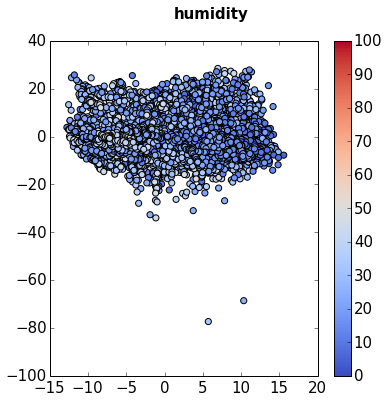

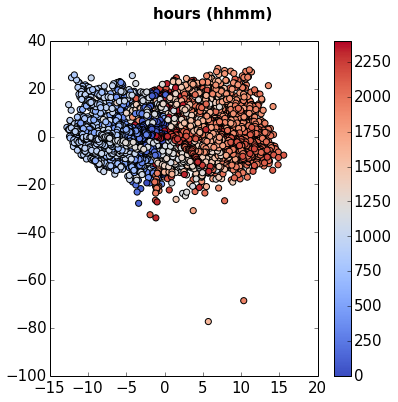

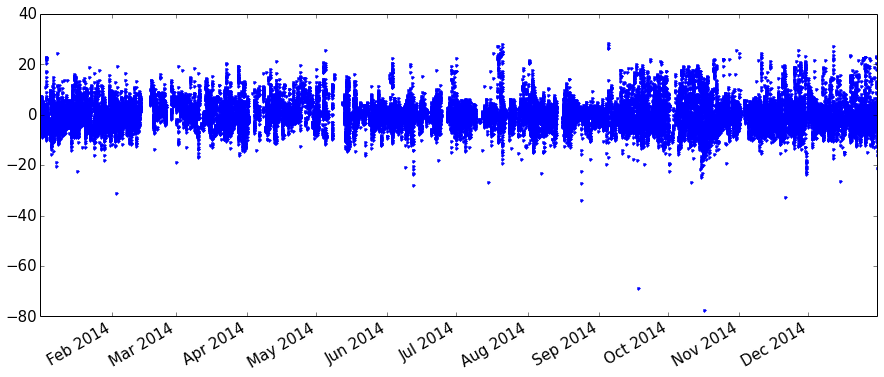

In [227]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,12,31)
datecond = np.where((date > datelim1) & (date < datelim2) & (hum > 0) & (hum < 50)   )
deltat = time[1] - time[0]
tcut = 1.5*24
counter = 0
radiofiltered = []
tempfiltered = []
fcut = 1./(tcut*3600)
tempf = utils.highpass(temp,1./(deltat),2,fcut)
radiof = utils.highpass(radio,1./(deltat),2,fcut)


#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],1)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])

fig = plt.figure(figsize=(6,6))
fig.suptitle('humidity',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig2 = plt.figure(figsize=(6,6))
fig2.suptitle('hours (hhmm)',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond], newradio0,'.')
#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
plt.gcf().autofmt_xdate()

print 'std = ' , np.std(newradio0)

- daily variation: examples

std =  3.57404737822


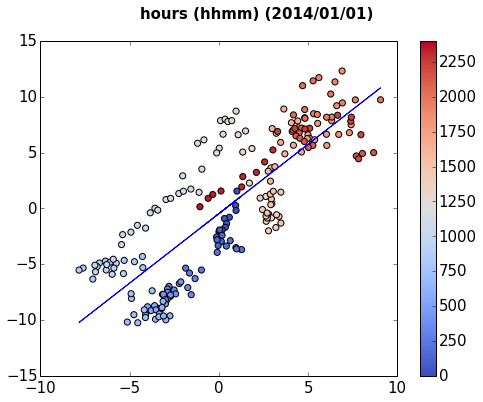

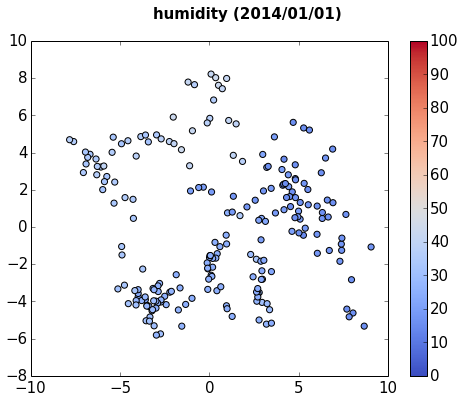

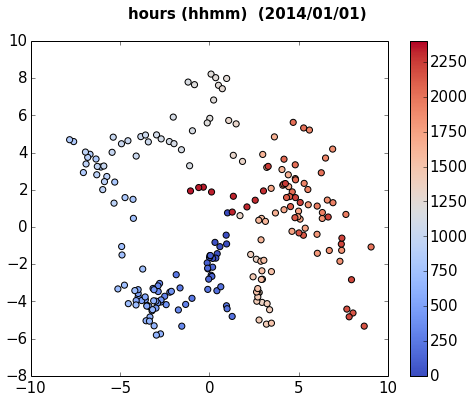

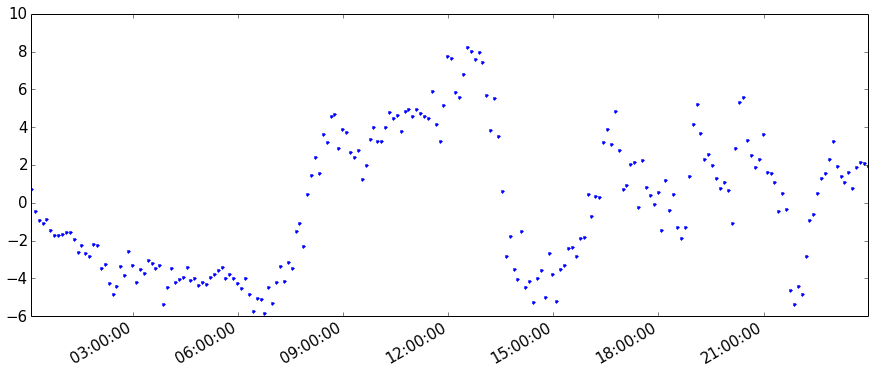

In [43]:
import datetime
datelim1 = datetime.datetime(2014,1,1)
datelim2 = datetime.datetime(2014,1,2)
datecond = np.where((date > datelim1) & (date < datelim2) & (hum > 0) & (hum < 50)   )
#datecond = np.where((date > datelim1) & (date < datelim2)   )

#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],1)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])
fig0 = plt.figure(figsize=(8,6))
fig0.suptitle('hours (hhmm) (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],radiof[datecond],marker='.',s=150, linewidths=1, vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.plot(tempf[datecond],p0(tempf[datecond]))
plt.colorbar()
#plt.plot(temp[datecond],varradio[datecond],'.')
#plt.plot(varradio[datecond],newradio[datecond],'.')

fig = plt.figure(figsize=(8,6))
fig.suptitle('humidity (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)

plt.colorbar()
fig2 = plt.figure(figsize=(8,6))
fig2.suptitle('hours (hhmm)  (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond], newradio0,'.')
#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
plt.gcf().autofmt_xdate()

#fig = plt.figure(figsize=(15,6))
#plt.scatter(hhmm[datecond], newradio0,marker='.',s=150, linewidths=1, c =time[datecond], cmap=plt.cm.coolwarm)
#plt.colorbar()

print 'std = ' , np.std(newradio0)

std =  5.05456026122


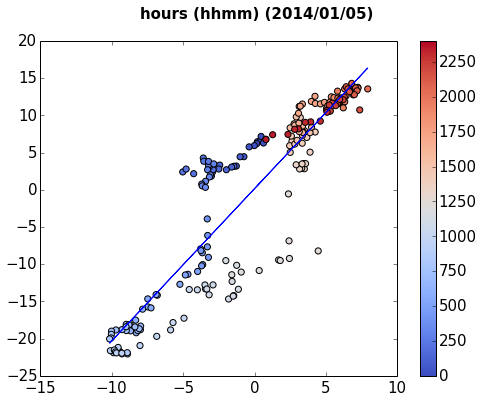

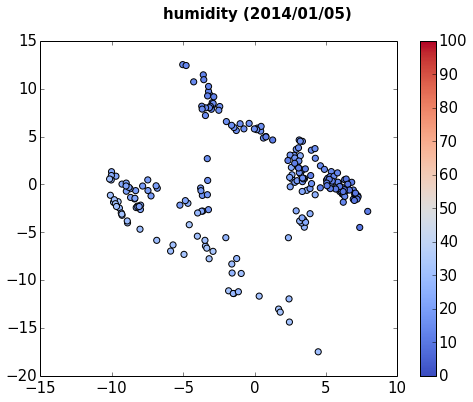

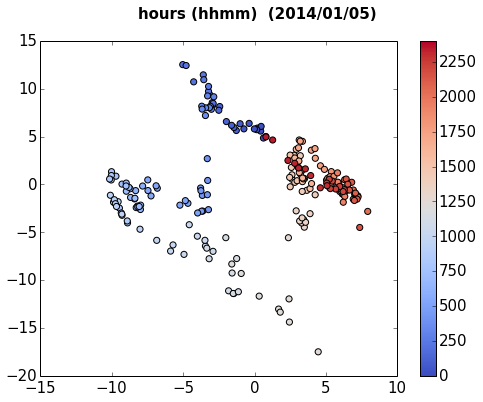

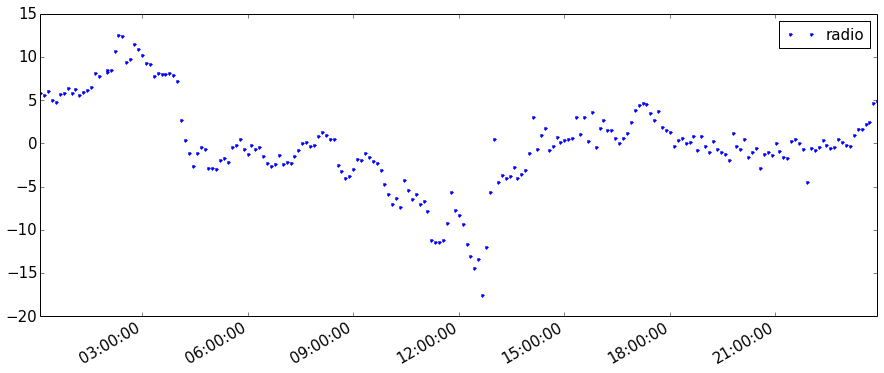

In [44]:
import datetime
datelim1 = datetime.datetime(2014,1,5)
datelim2 = datetime.datetime(2014,1,6)
datecond = np.where((date > datelim1) & (date < datelim2) & (hum > 0) & (hum < 50)   )
#datecond = np.where((date > datelim1) & (date < datelim2)   )

#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],1)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])
fig0 = plt.figure(figsize=(8,6))
fig0.suptitle('hours (hhmm) (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],radiof[datecond],marker='.',s=150, linewidths=1, vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.plot(tempf[datecond],p0(tempf[datecond]))
plt.colorbar()
#plt.plot(temp[datecond],varradio[datecond],'.')
#plt.plot(varradio[datecond],newradio[datecond],'.')

fig = plt.figure(figsize=(8,6))
fig.suptitle('humidity (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)

plt.colorbar()
fig2 = plt.figure(figsize=(8,6))
fig2.suptitle('hours (hhmm)  (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond], newradio0,'.',label='radio')
#plt.plot(date[datecond], tempf[datecond],'.',label='temperature')
plt.legend(fontsize=15)
#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
plt.gcf().autofmt_xdate()

#fig = plt.figure(figsize=(15,6))
#plt.scatter(hhmm[datecond], newradio0,marker='.',s=150, linewidths=1, c =time[datecond], cmap=plt.cm.coolwarm)
#plt.colorbar()

print 'std = ' , np.std(newradio0)

std =  11.1383270789


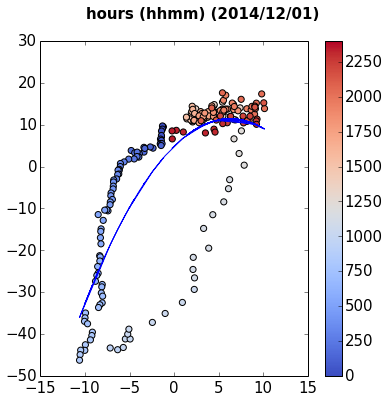

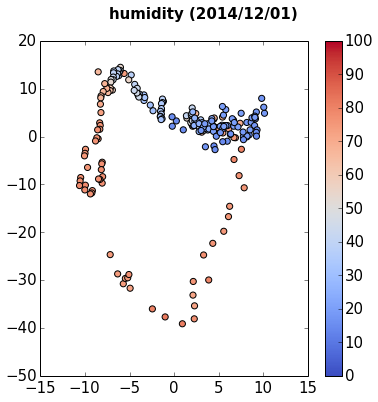

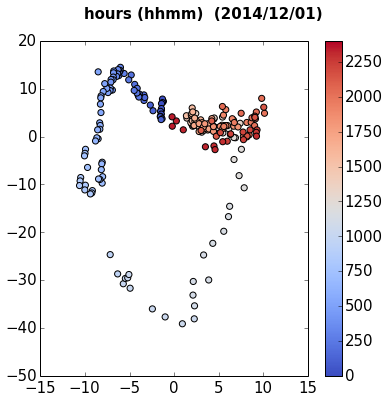

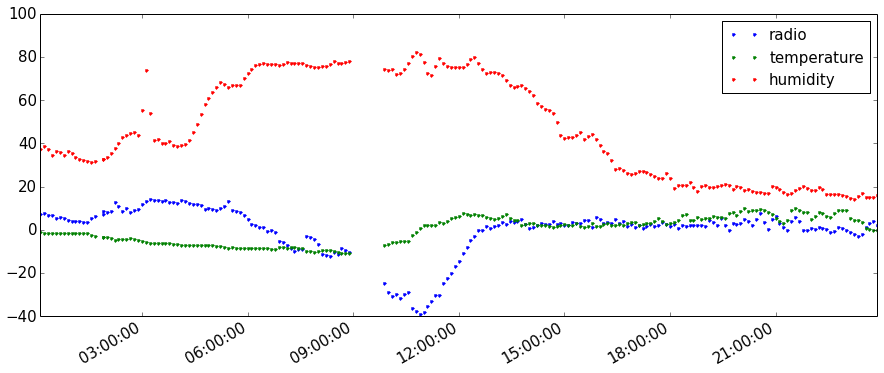

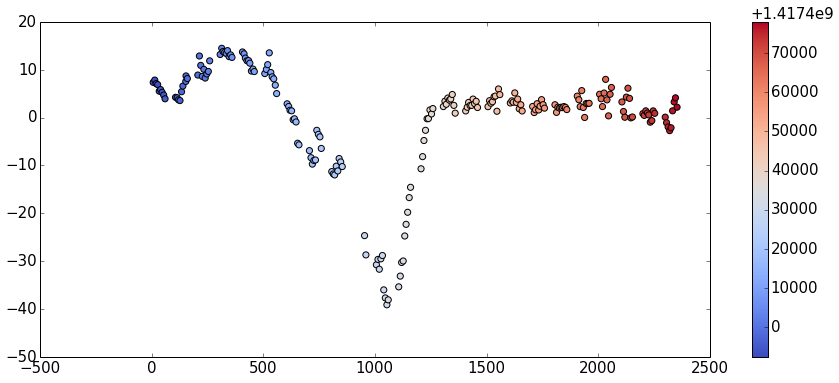

In [301]:
import datetime
datelim1 = datetime.datetime(2014,12,1)
datelim2 = datetime.datetime(2014,12,2)
#datecond = np.where((date > datelim1) & (date < datelim2) & (hum > 0) & (hum < 50)   )
datecond = np.where((date > datelim1) & (date < datelim2)   )

#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],2)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])
fig0 = plt.figure(figsize=(6,6))
fig0.suptitle('hours (hhmm) (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],radiof[datecond],marker='.',s=150, linewidths=1, vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.plot(tempf[datecond],p0(tempf[datecond]))
plt.colorbar()
#plt.plot(temp[datecond],varradio[datecond],'.')
#plt.plot(varradio[datecond],newradio[datecond],'.')

fig = plt.figure(figsize=(6,6))
fig.suptitle('humidity (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)

plt.colorbar()
fig2 = plt.figure(figsize=(6,6))
fig2.suptitle('hours (hhmm)  (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond], newradio0,'.',label='radio')
plt.plot(date[datecond], tempf[datecond],'.',label='temperature')
plt.plot(date[datecond], hum[datecond],'.',label='humidity')
plt.legend(fontsize=15)
#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
plt.gcf().autofmt_xdate()

fig = plt.figure(figsize=(15,6))
plt.scatter(hhmm[datecond], newradio0,marker='.',s=150, linewidths=1, c =time[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()

print 'std = ' , np.std(newradio0)

std =  4.09164390309


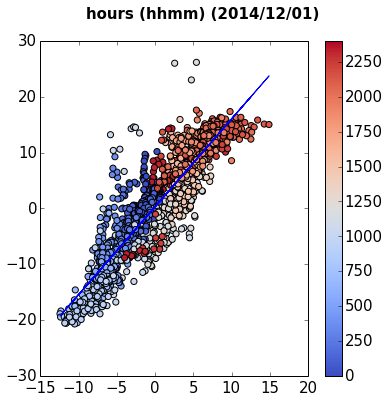

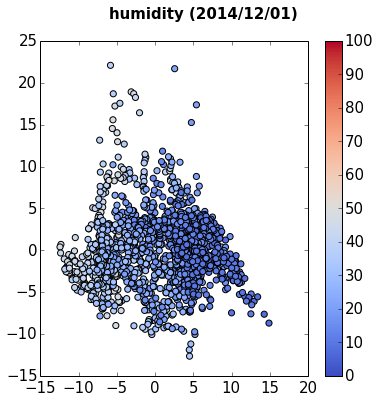

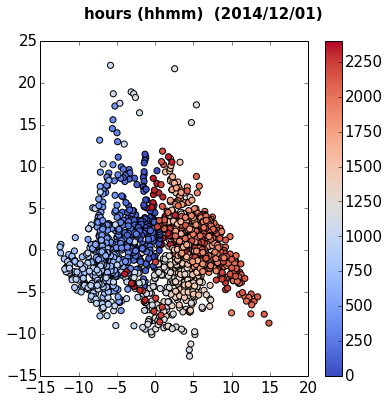

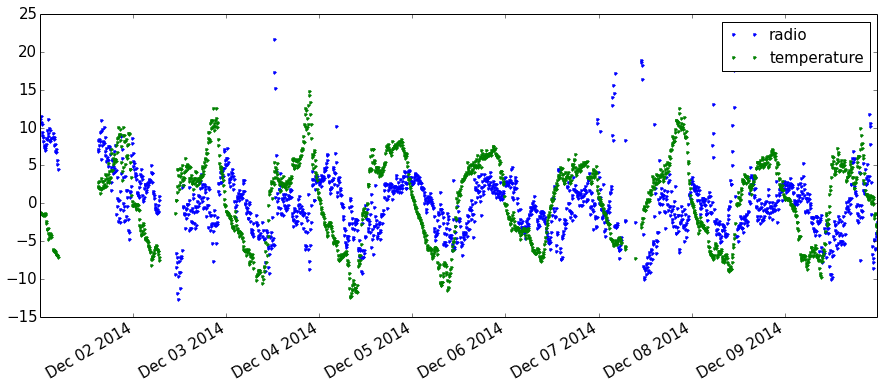

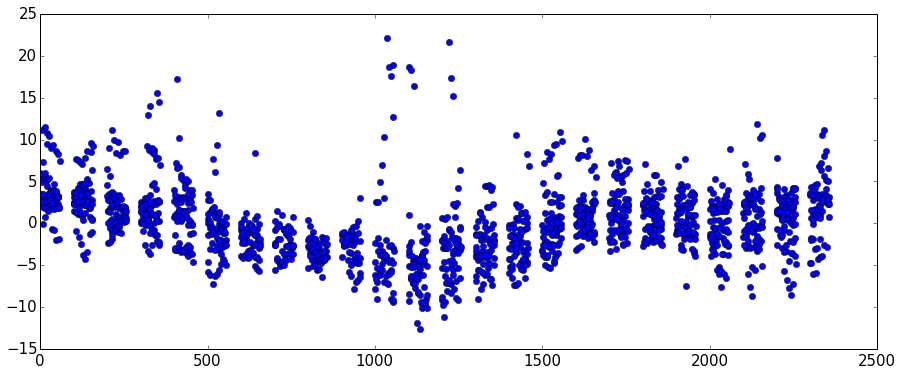

In [7]:
import datetime
datelim1 = datetime.datetime(2014,12,1)
datelim2 = datetime.datetime(2014,12,10)
#datecond = np.where((date > datelim1) & (date < datelim2) & (hum > 0) & (hum < 50)  & (hhmm < 1300) )
datecond = np.where((date > datelim1) & (date < datelim2)  & (hum > 0) & (hum < 50)   )

#fits:
fit0 = np.polyfit(tempf[datecond],radiof[datecond],1)
p0 = np.poly1d(fit0)
newradio0 = radiof[datecond] - p0(tempf[datecond])
fig0 = plt.figure(figsize=(6,6))
fig0.suptitle('hours (hhmm) (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],radiof[datecond],marker='.',s=150, linewidths=1, vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.plot(tempf[datecond],p0(tempf[datecond]))
plt.colorbar()
#plt.plot(temp[datecond],varradio[datecond],'.')
#plt.plot(varradio[datecond],newradio[datecond],'.')

fig = plt.figure(figsize=(6,6))
fig.suptitle('humidity (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =hum[datecond], cmap=plt.cm.coolwarm)

plt.colorbar()
fig2 = plt.figure(figsize=(6,6))
fig2.suptitle('hours (hhmm)  (' + datelim1.strftime('%Y/%m/%d')+')',fontsize=15, fontweight='bold')
plt.scatter(tempf[datecond],newradio0, marker='.',s=150, linewidths=1,vmin=0, vmax=2400, c =hhmm[datecond], cmap=plt.cm.coolwarm)
plt.colorbar()
fig = plt.figure(figsize=(15,6))
plt.plot(date[datecond], newradio0,'.',label='radio')
plt.plot(date[datecond], tempf[datecond],'.',label='temperature')
plt.legend(fontsize=15)
#plt.plot(date[datecond], radio[datecond] - 430,'.')
#plt.ylim(-100,100)
plt.gcf().autofmt_xdate()

fig = plt.figure(figsize=(15,6))
#plt.scatter(hhmm[datecond], newradio0,marker='.',s=150, linewidths=1, c =time[datecond], cmap=plt.cm.coolwarm)
#plt.colorbar()
plt.plot(hhmm[datecond], newradio0,'o')


print 'std = ' , np.std(newradio0)

[ -7.06549969  -1.8164999    3.43249989   8.68149967  13.93049946
  19.17949924  24.42849903  29.67749882  34.9264986   40.17549839]
[  8.61710244  12.65607371  17.65072741  23.50907969  28.37865068
  33.80230737  39.69544345  45.43368183  50.57443546  52.81415799]


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: temp (Potential memory leak).


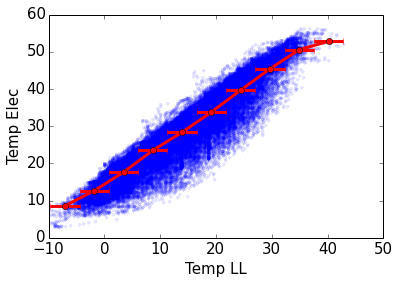

Info in <TCanvas::Print>: ps file c1.ps has been created


In [17]:
import ROOT as r
tempbis = temp[tempelec>0]
tempelecbis = tempelec[tempelec>0]
mint = np.min(tempbis)
maxt = np.max(tempbis)
proot = r.TProfile("temp","temp",10,mint,maxt)
for t1, t2 in zip(tempbis,tempelecbis):
    proot.Fill(t1,t2)

c = r.TCanvas()
proot.Draw("")
c.Print()


prof = utils.makeprofile(tempbis,tempelecbis,10,np.min(tempbis),np.max(tempbis))

plt.plot(tempbis,tempelecbis,'.',alpha=0.1,zorder=-32)
plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],lw=3, c='r',marker='o')
plt.xlabel('Temp LL')
plt.ylabel('Temp Elec')

print prof[0]
print prof[1]



#new analysis with selected period (16/02/2016)

The following comments were given at the weekly meeting:
- try a sliding window instead of filtering (understand better what we do, no edge effect in the case of numerical filter some weird effect can happen.)
- fit on portion of the baseline (like a few hours)
- some atmospheric data can be found in GDAS 
- modify the search method: instead of trying to parameterize the baseline everywhere, select signal region and control region, based on when we expect the sun. Then work on the control region and apply it to the signal.

## period selection

The period selection is done on the expected flux. I implemented in a different project the expected flux from the sun accounting for the measured flux by other observatory, the sun position in the sky and the antenna effective area.
(cf sun transit note and code at /Users/romain/work/Auger/EASIER/LPSC/suntransit/script/)  
For instance, here is the expected raise in ADC counts for a system temperature of 50K:

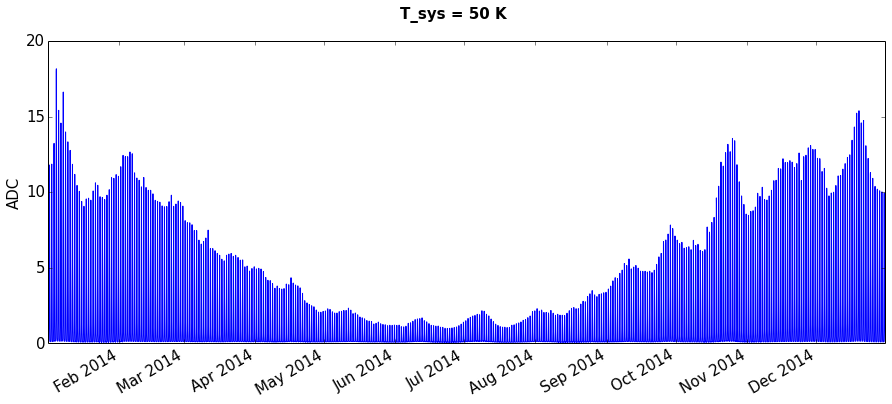

In [2]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/suntransit/script/analysis/')
%run yearlyflux.py

or for one particular day:

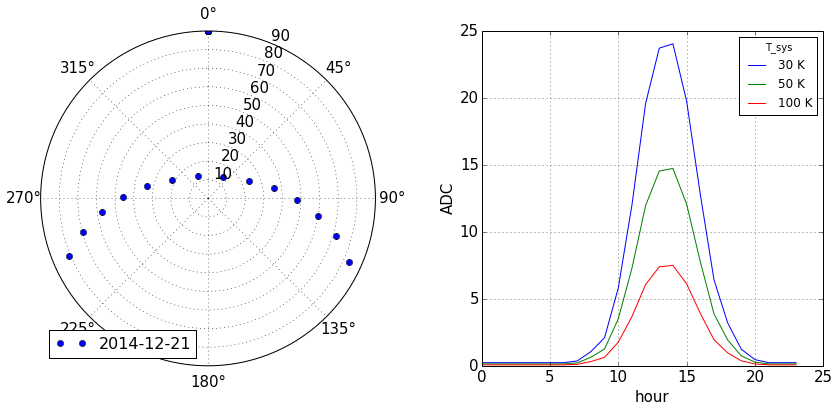

In [3]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/suntransit/script/test/')
%run testdailyflux.py 2014 12 21

We produce from these expected values a mask for the baseline data and dump it in a file and separe the period when we expect signal from the sun and period we don't.  
Here is an example on a few days, we define the period we don't expect sun as the time when we expect less than 2 ADC raise from the sun:

Welcome to ROOTaaS 6.06/00


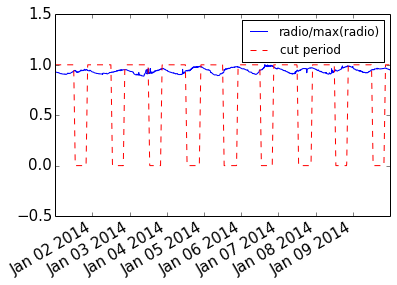

In [2]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/test')
%run cutperiod.py

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
#from lmfit import minimize, Parameters, Parameter, report_fit
import os
import sys
srcpwd = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/script'
utilspath =srcpwd + '/utils/'
sys.path.append(utilspath)
import utils
classpath = srcpwd + '/classes/'
sys.path.append(classpath)
import dataset

datafolder = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/data/'
fname = 'Antenna_2014-01-01_2014-01-30.root'                                                                                                                     
#fname = 'Antenna_2014-01-01_2014-12-31.root'
file = datafolder + fname

data = dataset.Dataset(file)
data.loaddata()
cond = np.where(
    (data.data['LSId']==343)
    & (data.data['FDLLOutsideTemp']>-10)
    & (data.data['Anode'][:,0]> 400)
    &(np.invert(np.isnan(data.data['FDLLOutsideTemp']) ))
    &(np.invert(np.isinf(data.data['FDLLOutsideTemp']) ))
    &(np.invert(np.isnan(data.data['LLHumidity']) ))
    &(np.invert(np.isinf(data.data['LLHumidity']) ))
    )
#get the data from the data instance
temp = data.getdata('FDLLOutsideTemp',cond)
tempelec = data.getdata('TempElec',cond)
aeraE = data.getdata('AeraEField',cond)
hum = data.getdata('LLHumidity',cond)
radio = data.getdata('Anode',cond,0)
time = data.getdata('Time',cond)
hhmm = data.getdata('hhmm',cond)
solarV = data.getdata('SolarPanelV',cond)
solarI = data.getdata('SolarPanelI',cond)

varradio = data.getdata('VarianceAnode',cond,0)
#this is just for the fft (in case there is odd number of sample 
# the result after filtering is not the same size)
if (len(time) %2 == 1):
    temp = temp[:-1]
    tempelec = tempelec[:-1]
    aeraE = aeraE[:-1]
    hum = hum[:-1]
    radio = radio[:-1]
    varradio = varradio[:-1]
    time = time[:-1]
    hhmm = hhmm[:-1]
    solarV = solarV[:-1]
    solarI = solarI[:-1]   

    
date = utils.nptstamptodatetime(time)

# now load the cut from the sun transit:
# period file:                                                                                                                                                      
pfile = '/Users/romain/work/Auger/EASIER/LPSC/suntransit/data/period/controlperiod_Tsys_50K_below_2adc.txt'
timeperiod = utils.readtwocolfile(pfile)
#inerpolate with the monitoring deltat:                                                                                                                             
newperiod = np.interp(time,timeperiod[0],timeperiod[1])

Welcome to ROOTaaS 6.06/00


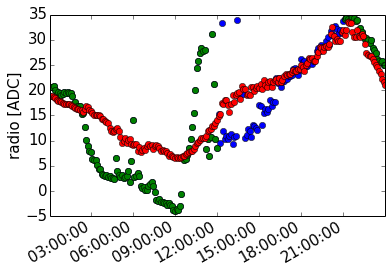

In [2]:
import datetime
datelim1 = datetime.datetime(2014,1,3)
datelim2 = datetime.datetime(2014,1,4)
datecond = np.where((date > datelim1) & (date < datelim2)  & (hum > 0) & (hum < 50) )
periodcond = np.where((date > datelim1) & (date < datelim2) & (newperiod==1)  & (hum > 0) & (hum < 50) )
#datecond = np.where((date > datelim1) & (date < datelim2)   )
#periodcond = np.where((date > datelim1) & (date < datelim2) & (newperiod==1))


#periodcond = datecond or np.where((newperiod==1))
plt.plot(date[datecond],radio[datecond]-450,'o')
plt.plot(date[periodcond],radio[periodcond]-450,'o')
plt.plot(date[datecond],temp[datecond],'o')
plt.ylabel('radio [ADC]')
plt.gcf().autofmt_xdate()

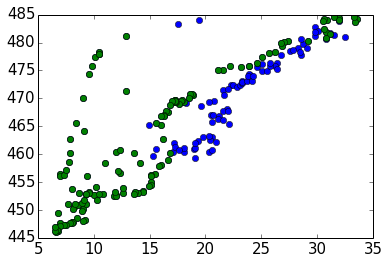

In [3]:
import datetime
datelim1 = datetime.datetime(2014,1,3)
datelim2 = datetime.datetime(2014,1,4)
datecond = np.where((date > datelim1) & (date < datelim2))
periodcond = np.where((date > datelim1) & (date < datelim2) & (newperiod==1))
plt.plot(temp[datecond],radio[datecond],'o')
plt.plot(temp[periodcond],radio[periodcond],'o')

## sliding window

The sliding window is implemented with a convolution with a constant of nbins.
Here is an example:

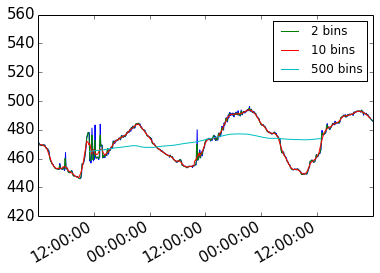

In [4]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/test')
%run testslidingwindow.py

Here are some tests to produce subdata set, they will be needed to try 
different sliding window and also to loop on the days without reloading all the dataset

In [1]:
#new way to load data
# the basic cuts are already in the select leaf
%matplotlib inline 
srcpwd = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/script'
utilspath =srcpwd + '/utils/'
sys.path.append(utilspath)
import utils
classpath = srcpwd + '/classes/'
sys.path.append(classpath)
import dataset

datafolder = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/data/'
#fname = 'Antenna_2014-01-01_2014-01-30.root'
fname = 'Antenna_2014-01-01_2014-12-31.root'                                                                                                        
file = datafolder + fname

data = dataset.Dataset(file)
data.loaddata()

pfile = '/Users/romain/work/Auger/EASIER/LPSC/suntransit/data/period/controlperiod_Tsys_50K_below_2adc.txt'
data.loadperiod(pfile)                                                                                                                              
data.selectleafs(343)

Welcome to ROOTaaS 6.06/00


Now we can select parts of the data easily, apply first a sliding window.

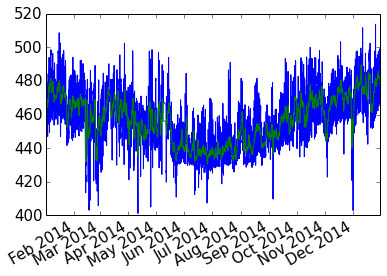

In [16]:
#for instance lets look at 2 different sliding windows:
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
data1.slidingwindow(10)

data2 = data.getnewdataset()
data2.slidingwindow(200)


plt.plot(data1.date,data1.radio)
plt.plot(data2.date,data2.radio)
plt.gcf().autofmt_xdate()


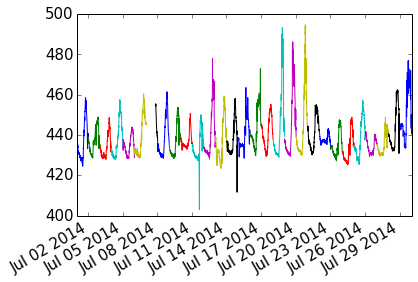

In [121]:
#for instance if we want to loop over the days of january:
month = 7
for d in range(1,30,1):
    t0 = utils.datettotimestamp(datetime.datetime(2014,month,d,00,00,00))
    t1 = utils.datettotimestamp(datetime.datetime(2014,month,d+1,00,00,00))
    data1 = data.getnewdataset(t0,t1) 
    plt.plot(data1.date, data1.radio)
plt.gcf().autofmt_xdate()

<matplotlib.colorbar.Colorbar instance at 0x127ffe908>

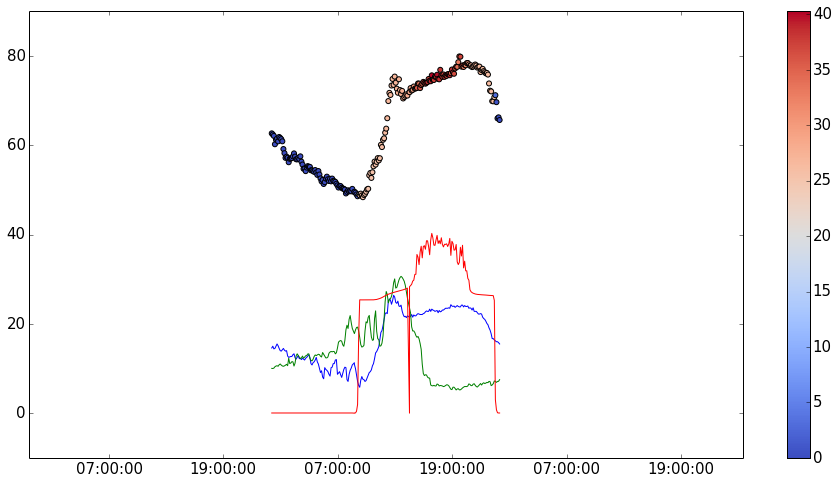

In [140]:
#for instance if we want to loop over the days of january:
month = 11
#data1 = data.getnewdataset()

#for d in range(1,30,1):
d = 6
t0 = utils.datettotimestamp(datetime.datetime(2014,month,d,00,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,d+1,00,00,00))
data1 = data.getnewdataset(t0,t1) 
solV = data1.solarV
#    plt.plot(solV[solV > 25], data1.radio[solV> 25] , '.'
fig = plt.figure(figsize=(16,8))
#plt.scatter(data1.date[solV > 25], data1.radio[solV> 25]-400,marker='.',s=100, c = solV[solV>25], cmap=plt.cm.coolwarm)
plt.scatter(data1.date, data1.radio-400,marker='.',s=100, c = solV, cmap=plt.cm.coolwarm)
plt.plot(data1.date,data1.tempLL)
plt.plot(data1.date,data1.humLL)
plt.plot(data1.date,solV)
plt.colorbar()
#plt.gcf().autofmt_xdate()

- Month of june: (chosen because the expected sun flux is low)

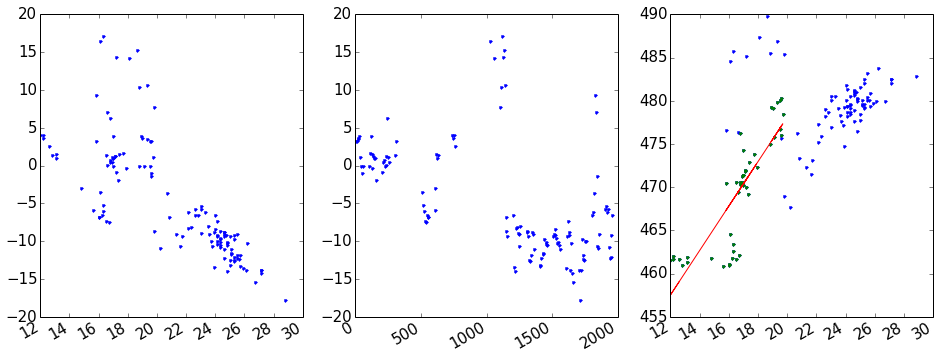

In [441]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)

#data1.slidingwindow(20)
month = 12
d0 = 13
d1 = 14
fig = plt.figure(figsize=(16,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
for d in range(d0,d1,1):
#    print d
    t0 = utils.datettotimestamp(datetime.datetime(2014,month,d,0,00,00))
    t1 = utils.datettotimestamp(datetime.datetime(2014,month,d,10,00,00))
    fitdata = data1.getnewdataset(t0,t1) 
    condfit = np.where(fitdata.humLL < 50)    
    if len((fitdata.radio[condfit])) == 0:
        continue
#    fit = np.polyfit(fitdata.tempLL,fitdata.radio,1)
    fit = np.polyfit(fitdata.tempLL[condfit],fitdata.radio[condfit],1)
    pfit = np.poly1d(fit)
    t2 = utils.datettotimestamp(datetime.datetime(2014,month,d,0,00,00))
    t3 = utils.datettotimestamp(datetime.datetime(2014,month,d,20,00,00))
    ndata = data1.getnewdataset(t2,t3) 
    conddata = np.where(ndata.humLL < 50)
    if len((ndata.radio[conddata])) == 0:
        continue
    newradio = ndata.radio - pfit(ndata.tempLL)
    ax1.plot(ndata.tempLL[conddata],newradio[conddata],'.')
    #   ax2.plot(ndata.hhmm,newradio)
#    ax2.plot(ndata.date[conddata],newradio[conddata])
#    ax2.plot(ndata.date[conddata],ndata.tempLL[conddata])
#    ax2.plot(ndata.date[conddata],ndata.humLL[conddata])
#    ax2.plot(ndata.date[conddata],ndata.solarV[conddata])
    ax2.plot(ndata.hhmm[conddata],newradio[conddata],'.')
    ax3.plot(ndata.tempLL[conddata],ndata.radio[conddata],'.')
    ax3.plot(fitdata.tempLL[condfit],fitdata.radio[condfit],'.')
    ax3.plot(fitdata.tempLL[condfit],pfit(fitdata.tempLL[condfit]))
plt.gcf().autofmt_xdate()

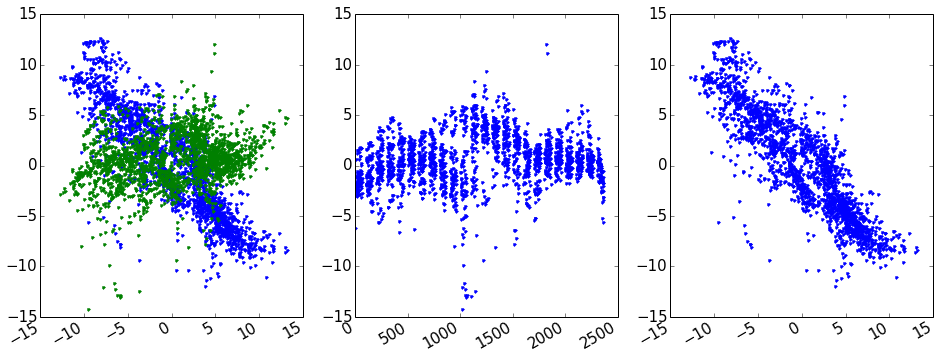

In [20]:
import datetime
#data.tempcorrection(1)
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
data1.filterHP(1.5)
data1.tempcorrection(1)

#data1.slidingwindow(5)
month = 1
d0 = 1
d1 = 10
fig = plt.figure(figsize=(16,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

#    print d
t0 = utils.datettotimestamp(datetime.datetime(2014,month,d0,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,d1,23,59,00))
fitdata = data1.getnewdataset(t0,t1) 
condfit = np.where( (fitdata.humLL < 50) & (fitdata.hhmm > 00) & (fitdata.hhmm < 1000))    
#if len((fitdata.radio[condfit])) == 0:
#    continue
#fit = np.polyfit(fitdata.tempLL,fitdata.radio,1)
fit = np.polyfit(fitdata.tempLL[condfit],fitdata.radioc[condfit],1)
#print fit
pfit = np.poly1d(fit)
t2 = utils.datettotimestamp(datetime.datetime(2014,month,d0,0,00,00))
t3 = utils.datettotimestamp(datetime.datetime(2014,month,d1,20,00,00))
ndata = data1.getnewdataset(t2,t3) 
conddata = np.where(ndata.humLL < 50)
#if len((ndata.radio[conddata])) == 0:
#    continue
newradio = ndata.radioc - pfit(ndata.tempLL)
ax1.plot(ndata.tempLL[conddata],ndata.radioc[conddata],'.')
ax1.plot(ndata.tempLL[conddata],newradio[conddata],'.')
    #   ax2.plot(ndata.hhmm,newradio)
#    ax2.plot(ndata.date[conddata],newradio[conddata])
#    ax2.plot(ndata.date[conddata],ndata.tempLL[conddata])
#    ax2.plot(ndata.date[conddata],ndata.humLL[conddata])
#    ax2.plot(ndata.date[conddata],ndata.solarV[conddata])
ax2.plot(ndata.hhmm[conddata],newradio[conddata],'.')
ax3.plot(ndata.tempLL[conddata],ndata.radioc[conddata],'.')
#ax3.plot(fitdata.tempLL[condfit],fitdata.radioc[condfit],'.')
#ax3.plot(fitdata.tempLL[condfit],pfit(fitdata.tempLL[condfit]))
plt.gcf().autofmt_xdate()

[ 1.58548829  0.56492501]


(-20, 20)

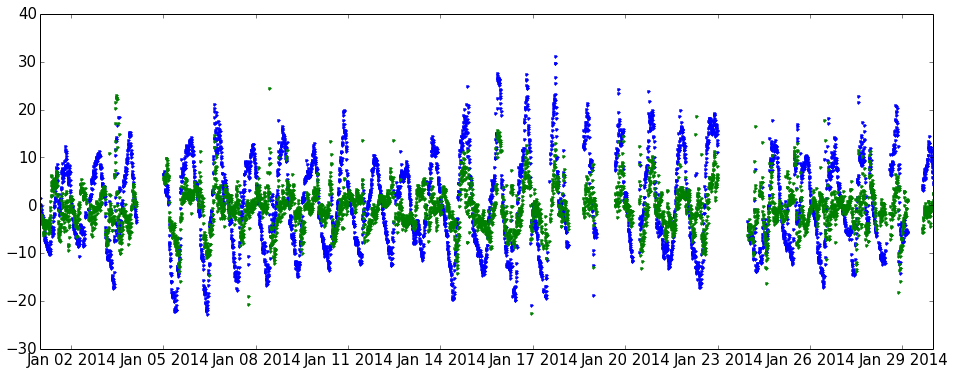

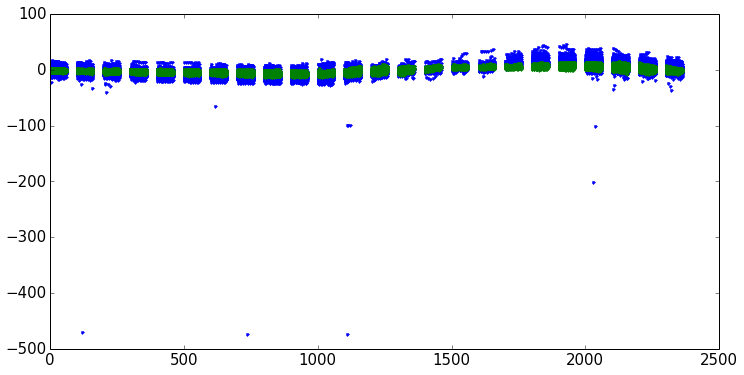

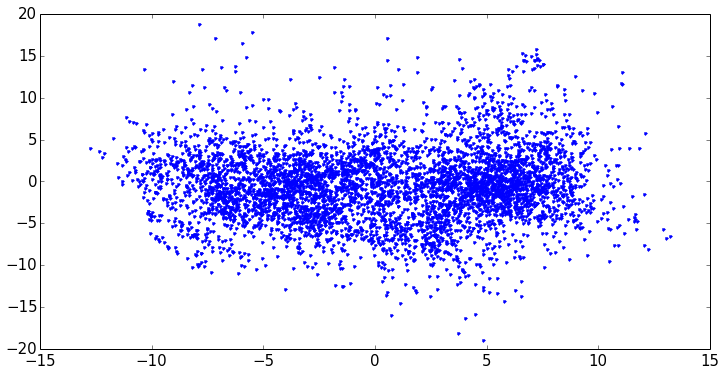

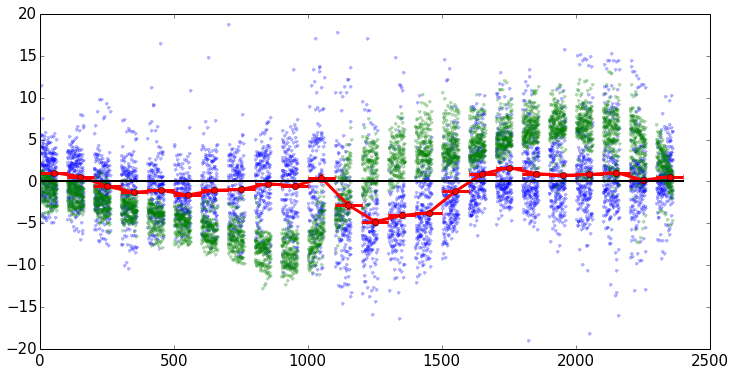

In [16]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
data1.filterHP(1.5)
#data1.slidingwindow(5)
#cond = np.where((data1.humLL <60))
#cond = np.where((data1.period==1) & (data1.humLL <60))
cond = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0) )
data2 = data1.getnewdatasetcond(cond)
data2.tempcorrection(1)
print data2.fit

data3 = data1.getnewdatasetcond(np.where((data1.humLL <50) & (data1.humLL >0) ))
data3.tempcorrectionwithfit(data2.fit)

#plt.plot(data1.tempLL,data1.radio,'.')
#plt.plot(data2.tempLL,data2.radio,'.')
#plt.plot(data2.tempLL,data2.radioc,'.')

month = 1
d0 = 1
d1 = 30
t0 = utils.datettotimestamp(datetime.datetime(2014,month,d0,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,d1,00,00,00))
data4 = data3.getnewdataset(t0,t1)
fig2 =  plt.figure(figsize=(16,6))
plt.plot(data4.date,data4.radio,'.')
plt.plot(data4.date,data4.radioc,'.')
#plt.plot(data3.date,data3.tempLL,'.')

fig3 =  plt.figure(figsize=(12,6))
plt.plot(data2.hhmm,data2.radio,'.')
plt.plot(data2.hhmm,data2.tempLL,'.')
#plt.plot(data4.tempLL,data4.radio,'.')
#plt.plot(data4.tempLL,data4.radioc,'.')


fig4 = plt.figure(figsize=(12,6))
plt.plot(data4.tempLL,data4.radioc,'.')
#plt.plot(data4.tempelec,data4.radioc,'.')
#prof = utils.makeprofile(data2.hhmm,data2.radioc,24,0,2400)
#plt.plot(data2.hhmm, data2.radioc,'.',alpha=0.3,zorder=-32)
#plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],lw=3, c='r',marker='o')
#plt.plot(np.linspace(0,2400,10),np.zeros(10),'k',lw=2)
plt.ylim(-20,20)
fig5 = plt.figure(figsize=(12,6))
prof = utils.makeprofile(data4.hhmm,data4.radioc,24,0,2400)
#plt.plot(tempbis,tempelecbis,'.',alpha=0.1,zorder=-32)
plt.plot(data4.hhmm, data4.radioc,'.',alpha=0.3,zorder=-32)
plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)
plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],lw=3, c='r',marker='o')
plt.plot(np.linspace(0,2400,10),np.zeros(10),'k',lw=2)



plt.ylim(-20,20)


#data1.tempcorrection(1)

74971
0.775233090128
0.471822438009


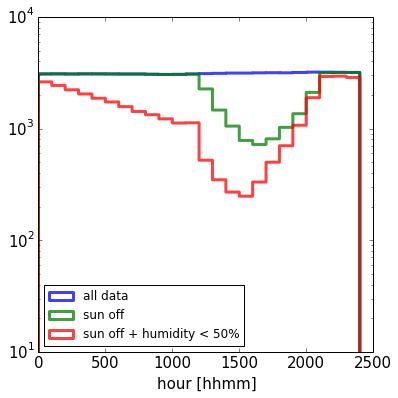

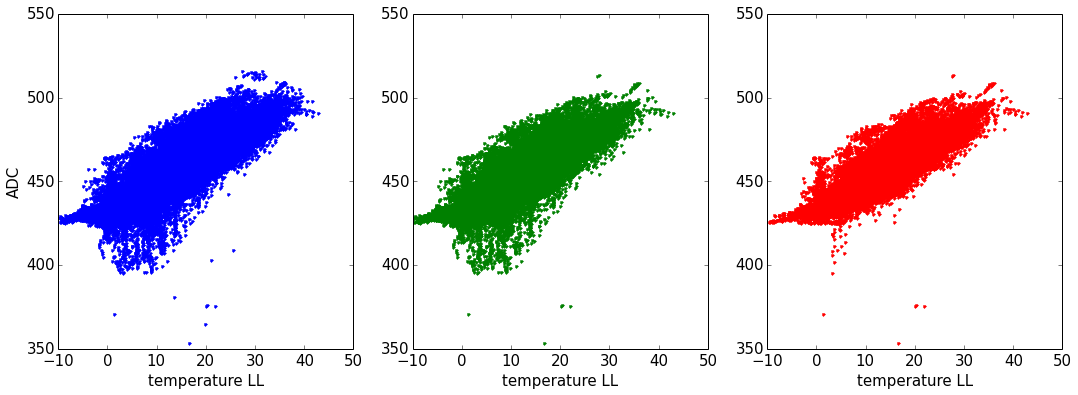

In [48]:
figdist = plt.figure(figsize = (6,6))
bins = np.linspace(0,2400,25)
#cond = np.where((data.period==1)  & (data.humLL <50)  & (data.humLL >0) )
cond = np.where((data.period==1)   )
cond2 = np.where((data.period==1)& (data.humLL <50)  & (data.humLL >0)   )
dataoff = data.getnewdatasetcond(cond)
datanew = data.getnewdatasetcond(cond2)
n1, bins1, patches1 = plt.hist(data.hhmm, bins=bins, histtype='step', lw=3, alpha=0.75,log=True,label='all data')
n2, bins2, patches2 = plt.hist(dataoff.hhmm, bins=bins, histtype='step', lw=3, alpha=0.75,log=True,label='sun off')
n3, bins3, patches3 = plt.hist(datanew.hhmm, bins=bins, histtype='step', lw=3, alpha=0.75,log=True,label='sun off + humidity < 50%')
plt.xlabel('hour [hhmm]')
plt.ylim(10,10000)
plt.legend(loc=3)

fig = plt.figure(figsize=(18,6))
plt.subplot(131)
plt.plot(data.tempLL,data.radio,'b.')
plt.ylim(350,550)
plt.ylabel('ADC')
plt.xlabel('temperature LL')
plt.subplot(132)
plt.plot(dataoff.tempLL,dataoff.radio,'g.')
plt.xlabel('temperature LL')
plt.ylim(350,550)
plt.subplot(133)
plt.plot(datanew.tempLL,datanew.radio,'r.')
plt.xlabel('temperature LL')
plt.ylim(350,550)

print len(data.tempLL)
print float(len(dataoff.tempLL))/len(data.tempLL)
print float(len(datanew.tempLL))/len(data.tempLL)



(-20, 20)

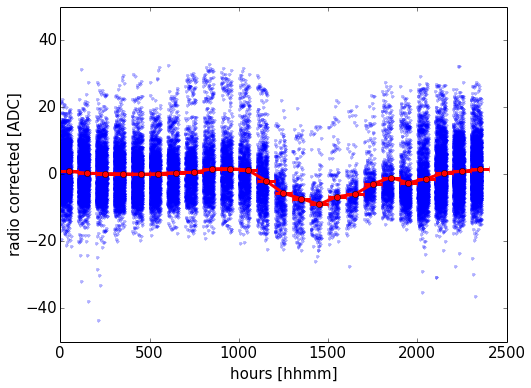

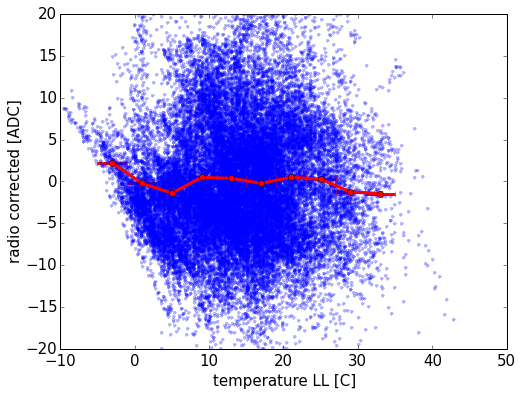

In [64]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
#data1.filterHP(1.5)
#data1.slidingwindow(5)
#cond = np.where((data1.humLL <60))
#cond = np.where((data1.period==1) & (data1.humLL <60))
cond = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0) )
data2 = data1.getnewdatasetcond(cond)
data2.tempcorrection(1)


month = 12
d0 = 1
d1 = 30
t0 = utils.datettotimestamp(datetime.datetime(2014,month,d0,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,d1,00,00,00))
data4 = data2.getnewdataset(t0,t1)

fig3 =  plt.figure(figsize=(8,6))
#plt.plot(data4.hhmm,data4.radioc,'.')
#plt.plot(data4.hhmm,data4.tempLL,'.')

plt.plot(data2.hhmm, data2.radioc,'.',alpha=0.3,zorder=-32)
prof = utils.makeprofile(data2.hhmm,data2.radioc,24,0,2400)
plt.ylim(-50,50)
plt.xlabel('hours [hhmm]')
plt.ylabel('radio corrected [ADC]')

#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)
plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],lw=3, c='r',marker='o')

figtemp =  plt.figure(figsize=(8,6))
proftemp = utils.makeprofile(data2.tempLL,data2.radioc,10,-5,35)
plt.plot(data2.tempLL,data2.radioc,'.',alpha=0.3)

#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)
plt.errorbar(proftemp[0],proftemp[1],xerr=proftemp[2],yerr=proftemp[3],lw=3, c='r',marker='o')
plt.xlabel('temperature LL [C]')
plt.ylabel('radio corrected [ADC]')





#plt.plot(data2.hhmm,data2.radioc,'.')
#plt.plot(data2.hhmm,data2.tempLL,'.')



plt.ylim(-20,20)


#data1.tempcorrection(1)

(-20, 20)

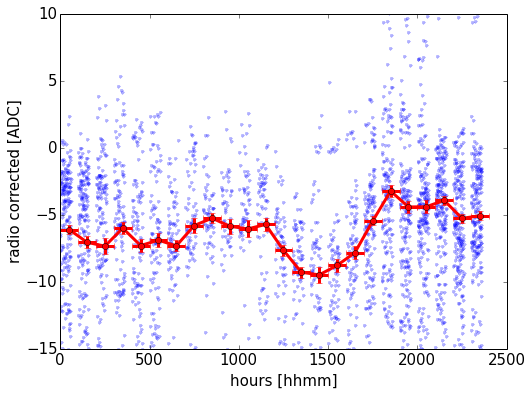

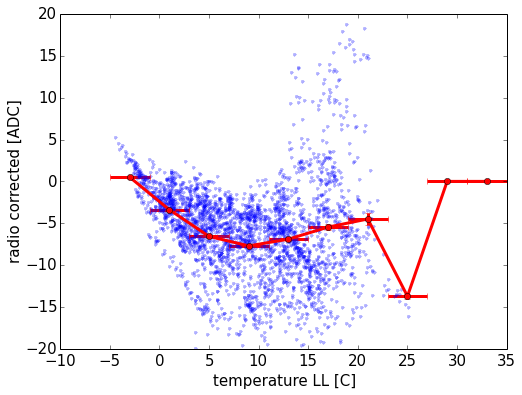

In [82]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
#data1.filterHP(1.5)
#data1.slidingwindow(5)
#cond = np.where((data1.humLL <60))
#cond = np.where((data1.period==1) & (data1.humLL <60))
cond = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0) )
data2 = data1.getnewdatasetcond(cond)
data2.tempcorrection(1)


month = 6
d0 = 1
d1 = 30
t0 = utils.datettotimestamp(datetime.datetime(2014,month,d0,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,d1,00,00,00))
data4 = data2.getnewdataset(t0,t1)

fig3 =  plt.figure(figsize=(8,6))
#plt.plot(data4.hhmm,data4.radioc,'.')
#plt.plot(data4.hhmm,data4.tempLL,'.')

plt.plot(data4.hhmm, data4.radioc,'.',alpha=0.3,zorder=-32)
prof = utils.makeprofile(data4.hhmm,data4.radioc,24,0,2400)
plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],lw=3, c='r',marker='o')
proft = utils.makeprofile(data4.hhmm,data4.tempLL,24,0,2400)
#plt.errorbar(proft[0],proft[1],xerr=proft[2],yerr=proft[3],lw=3, c='g',marker='o')


plt.ylim(-15,10)
plt.xlabel('hours [hhmm]')
plt.ylabel('radio corrected [ADC]')

#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)

figtemp =  plt.figure(figsize=(8,6))
proftemp = utils.makeprofile(data4.tempLL,data4.radioc,10,-5,35)
plt.plot(data4.tempLL,data4.radioc,'.',alpha=0.3)

#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)
plt.errorbar(proftemp[0],proftemp[1],xerr=proftemp[2],yerr=proftemp[3],lw=3, c='r',marker='o')
plt.xlabel('temperature LL [C]')
plt.ylabel('radio corrected [ADC]')





#plt.plot(data2.hhmm,data2.radioc,'.')
#plt.plot(data2.hhmm,data2.tempLL,'.')



plt.ylim(-20,20)


#data1.tempcorrection(1)

(-20, 20)

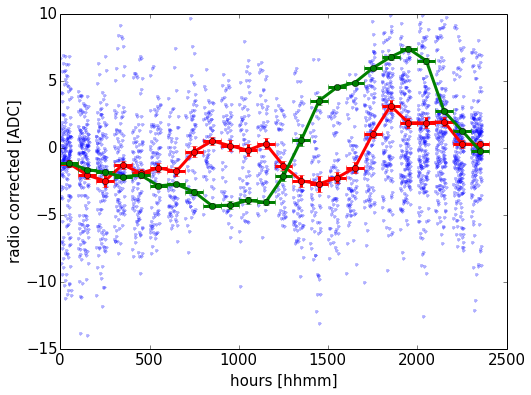

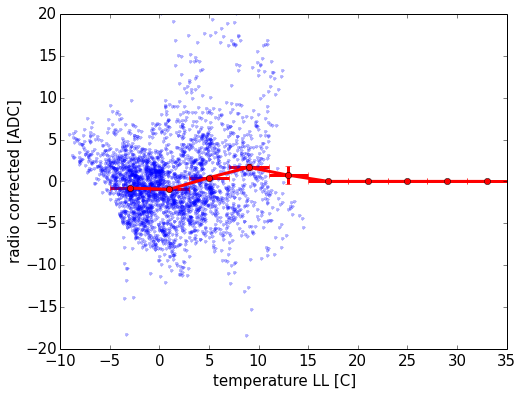

In [86]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
data1.filterHP(1.5)
#data1.slidingwindow(5)
#cond = np.where((data1.humLL <60))
#cond = np.where((data1.period==1) & (data1.humLL <60))
cond = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0) )
data2 = data1.getnewdatasetcond(cond)
data2.tempcorrection(1)


month = 6
d0 = 1
d1 = 30
t0 = utils.datettotimestamp(datetime.datetime(2014,month,d0,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,d1,00,00,00))
data4 = data2.getnewdataset(t0,t1)

fig3 =  plt.figure(figsize=(8,6))
#plt.plot(data4.hhmm,data4.radioc,'.')
#plt.plot(data4.hhmm,data4.tempLL,'.')

plt.plot(data4.hhmm, data4.radioc,'.',alpha=0.3,zorder=-32)
prof = utils.makeprofile(data4.hhmm,data4.radioc,24,0,2400)
plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],lw=3, c='r',marker='o')
proft = utils.makeprofile(data4.hhmm,data4.tempLL,24,0,2400)
plt.errorbar(proft[0],proft[1],xerr=proft[2],yerr=proft[3],lw=3, c='g',marker='o')


plt.ylim(-15,10)
plt.xlabel('hours [hhmm]')
plt.ylabel('radio corrected [ADC]')

#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)

figtemp =  plt.figure(figsize=(8,6))
proftemp = utils.makeprofile(data4.tempLL,data4.radioc,10,-5,35)
plt.plot(data4.tempLL,data4.radioc,'.',alpha=0.3)

#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)
plt.errorbar(proftemp[0],proftemp[1],xerr=proftemp[2],yerr=proftemp[3],lw=3, c='r',marker='o')
plt.xlabel('temperature LL [C]')
plt.ylabel('radio corrected [ADC]')
plt.ylim(-20,20)


[ 1.58548829  0.56492501]
[ 0.31707779  1.9776537 ]


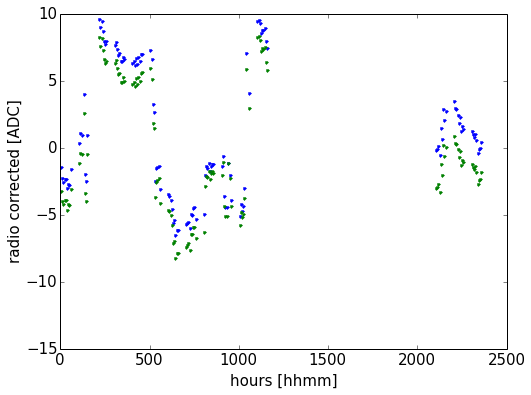

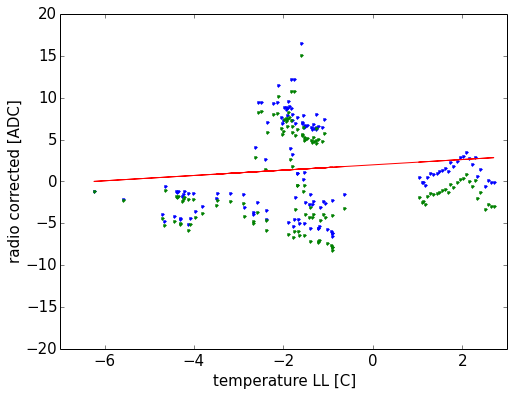

In [20]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
data1.filterHP(1.5)
#data1.slidingwindow(5)
#cond = np.where((data1.humLL <60))
#cond = np.where((data1.period==1) & (data1.humLL <60))
cond = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0))
data2 = data1.getnewdatasetcond(cond)
data2.tempcorrection(1)


month = 12
for d in range(21,22,1):
    t0 = utils.datettotimestamp(datetime.datetime(2014,month,d,0,00,00))
    t1 = utils.datettotimestamp(datetime.datetime(2014,month,d,23,59,00))
    data4 = data2.getnewdataset(t0,t1)
    datafit = data2.getnewdataset(t0,t1)

    datafit.tempcorrectionwithfit(data2.fit)

    print datafit.fit
    datafit.tempcorrection(1,True)
    print datafit.fit
    fig3 =  plt.figure(figsize=(8,6))
#plt.plot(data4.hhmm,data4.radioc,'.')
#plt.plot(data4.hhmm,data4.tempLL,'.')

    plt.plot(data4.hhmm, data4.radioc,'.',alpha=1,zorder=-32)
    plt.plot(datafit.hhmm, datafit.radioc,'.',alpha=1,zorder=-32)
#    prof = utils.makeprofile(data4.hhmm,data4.radioc,24,0,2400)
#    plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],lw=3, c='r',marker='o')
#    proft = utils.makeprofile(data4.hhmm,data4.tempLL,24,0,2400)
#    plt.errorbar(proft[0],proft[1],xerr=proft[2],yerr=proft[3],lw=3, c='g',marker='o')


    plt.ylim(-15,10)
    plt.xlabel('hours [hhmm]')
    plt.ylabel('radio corrected [ADC]')

#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)

    figtemp =  plt.figure(figsize=(8,6))
    proftemp = utils.makeprofile(data4.tempLL,data4.radioc,10,-5,35)
    plt.plot(data4.tempLL,data4.radioc,'.',alpha=1)
    pfit = np.poly1d(datafit.fit)
    plt.plot(datafit.tempLL,datafit.radioc,'.',alpha=1)
    plt.plot(datafit.tempLL,pfit(datafit.tempLL))


#plt.plot(data4.hhmm, data4.tempLL,'.',alpha=0.3,zorder=-32)
#    plt.errorbar(proftemp[0],proftemp[1],xerr=proftemp[2],yerr=proftemp[3],lw=3, c='r',marker='o')
    plt.xlabel('temperature LL [C]')
    plt.ylabel('radio corrected [ADC]')
    plt.ylim(-20,20)



(-20, 20)

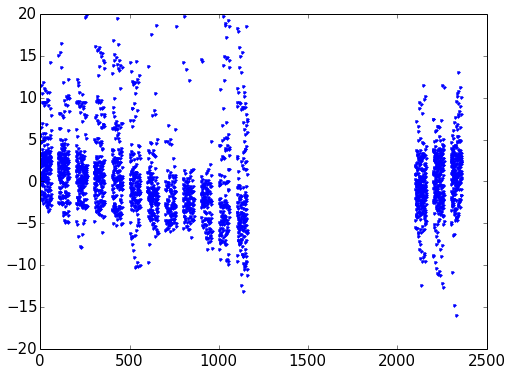

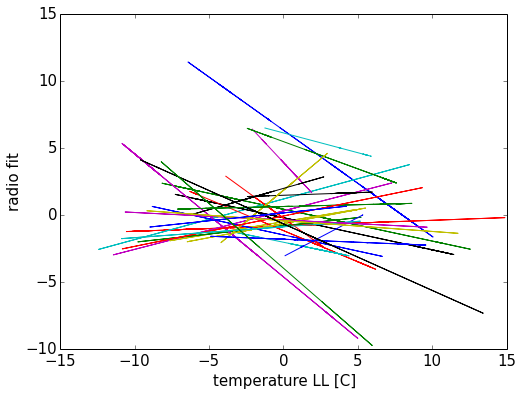

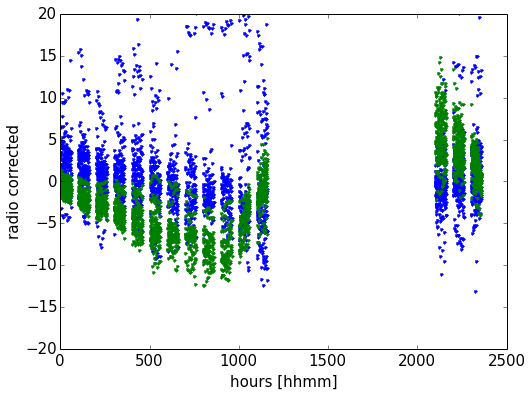

In [49]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
data1.filterHP(1.5)
#data1.slidingwindow(5)
#cond = np.where((data1.humLL <60))
#cond = np.where((data1.period==1) & (data1.humLL <60))
cond = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0) )
data2 = data1.getnewdatasetcond(cond)
data2.tempcorrection(1)

month = 12

figall = plt.figure(figsize=(8,6))
t0 = utils.datettotimestamp(datetime.datetime(2014,month,1,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,30,23,59,00))
datam = data2.getnewdataset(t0,t1)
dataf = data2.getnewdataset(t0,t1)
#dataf.tempcorrectionwithfit(data2.fit)
#dataf.tempcorrection(1,True)
pf = np.poly1d(dataf.fit)
#    plt.plot(datafit.tempLL,datafit.radioc,'.',alpha=1)
#plt.plot(dataf.tempLL,dataf.radioc,'.',label='all')
plt.plot(dataf.hhmm,dataf.radioc,'.',label='all')


#plt.plot(dataf.tempLL,pf(dataf.tempLL),label='all')
plt.ylim(-20,20)


fig =  plt.figure(figsize=(8,6))
newt = np.array([])
newr = np.array([])
newh = np.array([])
for d in range(1,31,1):
    t0 = utils.datettotimestamp(datetime.datetime(2014,month,d,0,00,00))
    t1 = utils.datettotimestamp(datetime.datetime(2014,month,d,23,59,00))
    data4 = data2.getnewdataset(t0,t1)
    if (len(data4.tempLL)==0):
        continue
    datafit = data2.getnewdataset(t0,t1)

    datafit.tempcorrectionwithfit(data2.fit)
    datafit.tempcorrection(1,True)

    pfit = np.poly1d(datafit.fit)
    newt = np.append(newt,datafit.tempLL)
    newr = np.append(newr,datafit.radioc)
    newh = np.append(newh,datafit.hhmm)
    #    plt.plot(datafit.tempLL,datafit.radioc,'.',alpha=1)
    plt.plot(datafit.tempLL,pfit(datafit.tempLL),label=str(d))
    plt.xlabel('temperature LL [C]')
    plt.ylabel('radio fit')
    #plt.legend()

fig2 = plt.figure(figsize=(8,6))
#plt.plot(newt,newr,'.')
plt.plot(newh,newr,'.')
plt.plot(newh,newt,'.')
plt.xlabel('hours [hhmm]')
plt.ylabel('radio corrected')


#plt.plot(datam.hhmm,datam.radioc,'.')
plt.ylim(-20,20)

In [51]:
import datetime
data1 = data.getnewdataset() # gets the whole data set (not the tree only the branches we selected before)
data1.filterHP(1.5)
#data1.slidingwindow(5)
#cond = np.where((data1.humLL <60))
#cond = np.where((data1.period==1) & (data1.humLL <60))
cond = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0) )
condam = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0)  & (data1.hhmm < 1200) )
condpm = np.where((data1.period==1)  & (data1.humLL <50)  & (data1.humLL >0)  & (data1.hhmm > 1200) )
data2 = data1.getnewdatasetcond(cond)
data2.tempcorrection(1)
dataam = data2.getnewdatasetcond(condam)
datapm = data2.getnewdatasetcond(condpm)

plt.plot(dataam.tempLL,dataam.radioc)
plt.plot(datapm.tempLL,datapm.radioc)


IndexError: index 35519 is out of bounds for size 35372